# Analyzing the Sensitivity Coefficients for the Parameters Entered Into BrosaYields Class

In [1]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex = 'mathjax')
from IPython.display import display, Math, Latex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm
%matplotlib inline

In [97]:
def getdata(dataID, dataFolders):
    
    for folderName in dataFolders:
        print('Data Gathered from {}. '.format(folderName))
        
        folderPath = os.path.join('/home/austinlc/Documents/SensitivityData',folderName)

        if not os.path.isdir(folderPath):
            raise ValueError('Bad Path for folder named: {}'.format(folderPath))
        
        files = sorted(os.listdir(folderPath))
        
        for filename in files:
            
            file = os.path.join(folderPath,filename)
            
            working_file = open(file)
            
            line = working_file.readline()
            if (line.find("#")!=0):
                sys.exit("ERROR: FIRST LINE OF OUTPUT FILE SHOULD CONTAIN '#'")
                return 0
            
            if dataID == "RT":
                # Existence Test - performed for EACH FILE
                try: RT
                except NameError: RT = {}
                
                RTfromFile = float(filename[filename.index('RT')+2:])/100
                RT[filename] = RTfromFile
                
            elif dataID == "alpha":
                # Existence Test - performed for EACH FILE
                try: alpha
                except NameError: alpha = {}
                
                alphafromFile = float(filename[filename.index('ALPHA')+5:])/100
                alpha[filename] = alphafromFile
                
            elif dataID == "Al":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Al
                except NameError: Al = {}
                Al[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        Al[filename].append(int(tempdata1[0]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Ah":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Ah
                except NameError: Ah = {}
                Ah[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        Ah[filename].append(int(tempdata1[0]))
                        if (int(tempdata1[0]) < 126):
                            print('bad news: ')
                            print(int(tempdata1[0]))
                            print('nfragments: ', nfragments)
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "A":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: A
                except NameError: A = {}
                A[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0):  break
                    nfragments+=1
                    tempdata1 = line.split()
                    A[filename].append(int(tempdata1[0]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Zl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Zl
                except NameError: Zl = {}
                Zl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        Zl[filename].append(int(tempdata1[1]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Zh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Zh
                except NameError: Zh = {}
                Zh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        Zh[filename].append(int(tempdata1[1]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Z":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Z
                except NameError: Z = {}
                Z[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    Z[filename].append(int(tempdata1[1]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Ul":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Ul
                except NameError: Ul = {}
                Ul[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        Ul[filename].append(float(tempdata1[2]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Uh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Uh
                except NameError: Uh = {}
                Uh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        Uh[filename].append(float(tempdata1[2]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "TXE":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: TXE
                except NameError: TXE = {}
                TXE[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        Ul = (float(tempdata1[2]))
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        Uh = (float(tempdata1[2]))
                        TXE[filename].append(Ul + Uh) #append after gathering the heavy frag excitation energy
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Jl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Jl
                except NameError: Jl = {}
                Jl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        Jl[filename].append(float(tempdata1[3]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Jh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Jh
                except NameError: Jh = {}
                Jh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        Jh[filename].append(float(tempdata1[3]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "J":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: J
                except NameError: J = {}
                J[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    J[filename].append(float(tempdata1[3]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "KEl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: KEl
                except NameError: KEl = {}
                KEl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        KEl[filename].append(float(tempdata1[5]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "KEh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: KEh
                except NameError: KEh = {}
                KEh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        KEh[filename].append(float(tempdata1[5]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "TKE":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: TKE
                except NameError: TKE = {}
                TKE[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        KEl = (float(tempdata1[5]))
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        KEh = (float(tempdata1[5]))
                        TKE[filename].append(KEl + KEh) #append after gathering the heavy frag
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "nnl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nnl
                except NameError: nnl = {}
                nnl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        nnl[filename].append(int(tempdata1[6]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "nnh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nnh
                except NameError: nnh = {}
                nnh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        nnh[filename].append(int(tempdata1[6]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "nnt":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nnt
                except NameError: nnt = {}
                nnt[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        nnl = (int(tempdata1[6]))
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        nnh = (int(tempdata1[6]))
                        nnt[filename].append(nnl + nnh) #append after gathering the heavy frag excitation energy
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "ngl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ngl
                except NameError: ngl = {}
                ngl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        ngl[filename].append(int(tempdata1[7]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "ngh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ngh
                except NameError: ngh = {}
                ngh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        ngh[filename].append(int(tempdata1[7]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "ngt":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ngt
                except NameError: ngt = {}
                ngt[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        ngl = (int(tempdata1[7]))
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        ngh = (int(tempdata1[7]))
                        ngt[filename].append(ngl + ngh) #append after gathering the heavy frag
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                        
            elif dataID == "nICl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nICl
                except NameError: nICl = {}
                nICl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        nICl[filename].append(int(tempdata1[8]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "nICh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nICh
                except NameError: nICh = {}
                nICh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        nICh[filename].append(int(tempdata1[8]))
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "nICt":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nICt
                except NameError: nICt = {}
                nICt[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        nICl = (int(tempdata1[8]))
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        nICh = (int(tempdata1[8]))
                        nICt[filename].append(nICl + nICh) #append after gathering the heavy frag
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "pcml":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: pcml
                except NameError: pcml = {}
                pcml[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        pcml[filename].append([tempdata2[0], tempdata2[1], tempdata2[2]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "pcmh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: pcmh
                except NameError: pcmh = {}
                pcmh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        pcmh[filename].append([tempdata2[0], tempdata2[1], tempdata2[2]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "pcm":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: pcm
                except NameError: pcm = {}
                pcm[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    pcm[filename].append([tempdata2[0], tempdata2[1], tempdata2[2]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "plabl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: plabl
                except NameError: plabl = {}
                plabl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        plabl[filename].append([tempdata2[3], tempdata2[4], tempdata2[5]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "plabh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: plabh
                except NameError: plabh = {}
                plabh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        plabh[filename].append([tempdata2[3], tempdata2[4], tempdata2[5]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "plab":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: plab
                except NameError: plab = {}
                plab[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    line = working_file.readline()
                    tempdata2 = line.split()
                    plab[filename].append([tempdata2[3], tempdata2[4], tempdata2[5]])
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Encml":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Encml
                except NameError: Encml = {}
                Encml[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            Encml[filename].append(float(tempdata3[8*i + 3]))
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Encmh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Encmh
                except NameError: Encmh = {}
                Encmh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            Encmh[filename].append(float(tempdata3[8*i + 3]))
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Encm":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Encm
                except NameError: Encm = {}
                Encm[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        Encm[filename].append(float(tempdata3[8*i + 3]))
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Enlabl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Enlabl
                except NameError: Enlabl = {}
                Enlabl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            Enlabl[filename].append(float(tempdata3[8*i + 7]))
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "Enlabh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Enlabh
                except NameError: Enlabh = {}
                Enlabh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            Enlabh[filename].append(float(tempdata3[8*i + 7]))
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Enlab":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Enlab
                except NameError: Enlab = {}
                Enlab[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        Enlab[filename].append(float(tempdata3[8*i + 7]))
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "Egcml":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Egcml
                except NameError: Egcml = {}
                Egcml[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[7])):
                            Egcml[filename].append(float(tempdata3[8*i + 3]))
            
            elif dataID == "Egcmh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Egcmh
                except NameError: Egcmh = {}
                Egcmh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[7])):
                            Egcmh[filename].append(float(tempdata3[8*i + 3]))
                
            elif dataID == "Egcm":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Egcm
                except NameError: Egcm = {}
                Egcm[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    for i in range(int(tempdata1[7])):
                        Egcm[filename].append(float(tempdata3[8*i + 3]))
                
            elif dataID == "Eglabl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Eglabl
                except NameError: Eglabl = {}
                Eglabl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[7])):
                            Eglabl[filename].append(float(tempdata3[8*i + 7]))
            
            elif dataID == "Eglabh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Eglabh
                except NameError: Eglabh = {}
                Eglabh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[7])):
                            Eglabh[filename].append(float(tempdata3[8*i + 7]))
                
            elif dataID == "Eglab":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: Eglab
                except NameError: Eglab = {}
                Eglab[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0):
                        line = working_file.readline()
                        tempdata3 = line.split()
                    for i in range(int(tempdata1[7])):
                        Eglab[filename].append(float(tempdata3[8*i + 7]))
                
            elif dataID == "ndircml":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndircml
                except NameError: ndircml = {}
                ndircml[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            ndircml[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "ndircmh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndircmh
                except NameError: ndircmh = {}
                ndircmh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            ndircmh[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "ndircm":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndircm
                except NameError: ndircm = {}
                ndircm[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        ndircm[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "ndirlabl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndirlabl
                except NameError: ndirlabl = {}
                ndirlabl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            ndirlabl[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])
                    if (int(tempdata1[7]) != 0): next(working_file)
            
            elif dataID == "ndirlabh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndirlabh
                except NameError: ndirlabh = {}
                ndirlabh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            ndirlabh[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "ndirlab":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: ndirlab
                except NameError: ndirlab = {}
                ndirlab[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        ndirlab[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])
                    if (int(tempdata1[7]) != 0): next(working_file)
                
            elif dataID == "gdircml":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdircml
                except NameError: gdircml = {}
                gdircml[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            gdircml[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
            
            elif dataID == "gdircmh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdircmh
                except NameError: gdircmh = {}
                gdircmh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            gdircmh[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
                
            elif dataID == "gdircm":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdircm
                except NameError: gdircm = {}
                gdircm[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        gdircm[filename].append([tempdata3[8*i + 0],tempdata3[8*i + 1] ,tempdata3[8*i + 2]])
                
            elif dataID == "gdirlabl":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdirlabl
                except NameError: gdirlabl = {}
                gdirlabl[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 1): # LIGHT FRAGMENT
                        for i in range(int(tempdata1[6])):
                            gdirlabl[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])
            
            elif dataID == "gdirlabh":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdirlabh
                except NameError: gdirlabh = {}
                gdirlabh[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    if (nfragments % 2 == 0): # HEAVY FRAGMENT
                        for i in range(int(tempdata1[6])):
                            gdirlabh[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])
                
            elif dataID == "gdirlab":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: gdirlab
                except NameError: gdirlab = {}
                gdirlab[filename] = []
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    line = working_file.readline()
                    tempdata3 = line.split()
                    for i in range(int(tempdata1[6])):
                        gdirlab[filename].append([tempdata3[8*i + 4],tempdata3[8*i + 5] ,tempdata3[8*i + 6]])

            elif dataID == "nevents":
                nfragments = 0
                # Existence Test - performed for EACH FILE
                try: nevents
                except NameError: nevents = {}
                nevents[filename] = 0
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfragments+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                nevents[filename] = int(nfragments / 2)
                
            elif dataID == "nfragments":
                nfrags = 0
                # Existence Test - performed for EACH FILE
                try: nfragments
                except NameError: nfragments = {}
                nfragments[filename] = 0
                while True:
                    line = working_file.readline()
                    if (len(line)==0): break
                    nfrags+=1
                    tempdata1 = line.split()
                    next(working_file)
                    if (int(tempdata1[6]) != 0): next(working_file)
                    if (int(tempdata1[7]) != 0): next(working_file)
                nfragments[filename] = nfrags
            
            else:
                print("ERROR: BAD DATA ID: {}, CHECK THAT ID IS CORRECT".format(dataID))
                return 0
                           
    # THE variable (dictionary) that is returned MUST BE THE SAME NAME AS THE STRING dataID
    return eval(dataID)
    
            

In [3]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  2.0.2


In [4]:
import json

#-- Read JSON-formatted data file
def readJSONDataFile (filename):
    
    with open(filename) as jsonFile:
        jsonData = json.load(jsonFile)
        
    exp = list()
    c=0
    for item in jsonData.get("entries"):
        exp.append(item)
        c=c+1
        
    return exp

#-- Plot experimental data sets corresponding to a particular quantity
def plotExperimentalData (quantity, **keyword_parameters):
    if ('format' in keyword_parameters):
        fmtplot = keyword_parameters['format']
    else:
        fmtplot = 'ko--'

    checkAuthor = False
    if ('author' in keyword_parameters):
        author = keyword_parameters['author']
        checkAuthor = True
    for exp in experiments:
        if (exp['quantity']==quantity):
            if (checkAuthor):
                if (author not in exp['authors']):
                    continue
            data = np.asarray(exp['data'])
            if ('renorm' in exp):
                coef = exp['renorm']
            else:
                coef = 1.0
            x = data[:,0]
            y = data[:,1]
            if ('label' in keyword_parameters):
                labelplot = keyword_parameters['label']
            else:
                labelplot = exp['label']
            plt.plot(x,y*coef,fmtplot,alpha=0.5,label=labelplot)

#-- Lists all experiments read in 
def listExperimentalData (experiments):
    for exp in experiments:
        print ("{0:10s} |  {1}, {2}".format(exp['quantity'], exp['authors'], exp['year']))
        

In [5]:
EXPERIMENTALDATAFILE = "/home/austinlc/Documents/FromPTalou/expdata-98252sf.js"

experiments = readJSONDataFile (EXPERIMENTALDATAFILE)

for exp in experiments:
    print ("{0:20s} |  {1}, {2}".format(exp['quantity'], exp['authors'], exp['year']))

YA                   |  F.-J. Hambsch, S. Oberstedt, P. Siegler, J. van Arle, R. Vogt, 1997
YA                   |  C. Budtz-Joergensen and H.-H. Knitter, 1988
YA                   |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
YA                   |  Sh. Zeynalov, F.-J.Hambsch, et al., 2011
YZ                   |  Wahl, 1987
TKEA                 |  Gook, 2014
SIGTKEA              |  A. Gook et al., 2014
Pnu                  |  P. Santi and M. Miller, 2008
PFNS                 |  W. Mannhart, 1989
PFNS2                |  W. Mannhart, 1989
nubarA               |  Vorobyev et al., 2004
EcmA                 |  Budtz-Jorgensen and Knitter, 1988
nubarTKE             |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A110        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A122        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A130        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nubarTKE_A142        |  A. Gook, F.-J. Hambsch, M. Vidali, 2014
nLF                  |  A. Skarsvag

In [6]:
# gather data - w0 

w0 = [0.6, 0.72222222, 0.74666667, 0.77111111,  0.79555556, 0.82]

avTXEw0 = []
TXEw0 = getdata('TXE', ['w0'])
for k,v in TXEw0.items(): avTXEw0.append(mean(v))
del TXEw0 # save space and delete unnecessary data

avTKEw0 = []
TKEw0 = getdata('TKE', ['w0'])
for k,v in TKEw0.items(): avTKEw0.append(mean(v))
del TKEw0 # save space and delete unnecessary data

avJw0 = []
Jw0 = getdata('J', ['w0'])
for k,v in Jw0.items(): avJw0.append(mean(v))
del Jw0 # save space and delete unnecessary data

nubarw0 = []
nnw0 = getdata('nnt', ['w0'])
for k,v in nnw0.items(): nubarw0.append(mean(v))

nmom2w0 = []
for k,v in nnw0.items(): 
    nmom2w0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2w0.append(mean(nmom2w0arr))

nmom3w0 = []
for k,v in nnw0.items(): 
    nmom3w0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3w0.append(mean(nmom3w0arr))
del nnw0 # save space and delete unnecessary data

Ngbarw0 = []
ngw0 = getdata('ngt', ['w0'])
for k,v in ngw0.items(): Ngbarw0.append(mean(v))

gmom2w0 = []
for k,v in ngw0.items(): 
    gmom2w0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2w0.append(mean(gmom2w0arr))

gmom3w0 = []
for k,v in ngw0.items(): 
    gmom3w0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3w0.append(mean(gmom3w0arr))
del ngw0 # save space and delete unnecessary data

avEnCMw0 = []
EnCMw0 = getdata('Encm', ['w0'])
for k,v in EnCMw0.items(): avEnCMw0.append(mean(v))
del EnCMw0 # save space and delete unnecessary data

avEgCMw0 = []
EgCMw0 = getdata('Egcm', ['w0'])
for k,v in EgCMw0.items(): avEgCMw0.append(mean(v))
del EgCMw0 # save space and delete unnecessary data

avEnLabw0 = []
EnLabw0 = getdata('Enlab', ['w0'])
for k,v in EnLabw0.items(): avEnLabw0.append(mean(v))
del EnLabw0 # save space and delete unnecessary data

avEgLabw0 = []
EgLabw0 = getdata('Eglab', ['w0'])
for k,v in EgLabw0.items(): avEgLabw0.append(mean(v))
del EgLabw0 # save space and delete unnecessary data

Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 
Data Gathered from w0. 


In [7]:
# gather data - w1 

w1 = np.linspace(0.15, 0.25, 10)

avTXEw1 = []
TXEw1 = getdata('TXE', ['w1'])
for k,v in TXEw1.items(): avTXEw1.append(mean(v))
del TXEw1 # save space and delete unnecessary data

avTKEw1 = []
TKEw1 = getdata('TKE', ['w1'])
for k,v in TKEw1.items(): avTKEw1.append(mean(v))
del TKEw1 # save space and delete unnecessary data

avJw1 = []
Jw1 = getdata('J', ['w1'])
for k,v in Jw1.items(): avJw1.append(mean(v))
del Jw1 # save space and delete unnecessary data

nubarw1 = []
nnw1 = getdata('nnt', ['w1'])
for k,v in nnw1.items(): nubarw1.append(mean(v))

nmom2w1 = []
for k,v in nnw1.items(): 
    nmom2w1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2w1.append(mean(nmom2w1arr))

nmom3w1 = []
for k,v in nnw1.items(): 
    nmom3w1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3w1.append(mean(nmom3w1arr))
del nnw1 # save space and delete unnecessary data

Ngbarw1 = []
ngw1 = getdata('ngt', ['w1'])
for k,v in ngw1.items(): Ngbarw1.append(mean(v))

gmom2w1 = []
for k,v in ngw1.items(): 
    gmom2w1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2w1.append(mean(gmom2w1arr))

gmom3w1 = []
for k,v in ngw1.items(): 
    gmom3w1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3w1.append(mean(gmom3w1arr))
del ngw1 # save space and delete unnecessary data

avEnCMw1 = []
EnCMw1 = getdata('Encm', ['w1'])
for k,v in EnCMw1.items(): avEnCMw1.append(mean(v))
del EnCMw1 # save space and delete unnecessary data

avEgCMw1 = []
EgCMw1 = getdata('Egcm', ['w1'])
for k,v in EgCMw1.items(): avEgCMw1.append(mean(v))
del EgCMw1 # save space and delete unnecessary data

avEnLabw1 = []
EnLabw1 = getdata('Enlab', ['w1'])
for k,v in EnLabw1.items(): avEnLabw1.append(mean(v))
del EnLabw1 # save space and delete unnecessary data

avEgLabw1 = []
EgLabw1 = getdata('Eglab', ['w1'])
for k,v in EgLabw1.items(): avEgLabw1.append(mean(v))
del EgLabw1 # save space and delete unnecessary data

Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 
Data Gathered from w1. 


In [8]:
# gather data - w2 

w2 = np.linspace(0.001, 0.07, 10)

avTXEw2 = []
TXEw2 = getdata('TXE', ['w2'])
for k,v in TXEw2.items(): avTXEw2.append(mean(v))
del TXEw2 # save space and delete unnecessary data

avTKEw2 = []
TKEw2 = getdata('TKE', ['w2'])
for k,v in TKEw2.items(): avTKEw2.append(mean(v))
del TKEw2 # save space and delete unnecessary data

avJw2 = []
Jw2 = getdata('J', ['w2'])
for k,v in Jw2.items(): avJw2.append(mean(v))
del Jw2 # save space and delete unnecessary data

nubarw2 = []
nnw2 = getdata('nnt', ['w2'])
for k,v in nnw2.items(): nubarw2.append(mean(v))

nmom2w2 = []
for k,v in nnw2.items(): 
    nmom2w2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2w2.append(mean(nmom2w2arr))

nmom3w2 = []
for k,v in nnw2.items(): 
    nmom3w2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3w2.append(mean(nmom3w2arr))
del nnw2 # save space and delete unnecessary data

Ngbarw2 = []
ngw2 = getdata('ngt', ['w2'])
for k,v in ngw2.items(): Ngbarw2.append(mean(v))

gmom2w2 = []
for k,v in ngw2.items(): 
    gmom2w2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2w2.append(mean(gmom2w2arr))

gmom3w2 = []
for k,v in ngw2.items(): 
    gmom3w2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3w2.append(mean(gmom3w2arr))
del ngw2 # save space and delete unnecessary data

avEnCMw2 = []
EnCMw2 = getdata('Encm', ['w2'])
for k,v in EnCMw2.items(): avEnCMw2.append(mean(v))
del EnCMw2 # save space and delete unnecessary data

avEgCMw2 = []
EgCMw2 = getdata('Egcm', ['w2'])
for k,v in EgCMw2.items(): avEgCMw2.append(mean(v))
del EgCMw2 # save space and delete unnecessary data

avEnLabw2 = []
EnLabw2 = getdata('Enlab', ['w2'])
for k,v in EnLabw2.items(): avEnLabw2.append(mean(v))
del EnLabw2 # save space and delete unnecessary data

avEgLabw2 = []
EgLabw2 = getdata('Eglab', ['w2'])
for k,v in EgLabw2.items(): avEgLabw2.append(mean(v))
del EgLabw2 # save space and delete unnecessary data

Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 
Data Gathered from w2. 


In [9]:
# gather data - dmin0 

dmin0 = np.linspace(10.,18.,10)
#for some reason file 7 (index 6) did not work
dmin0 = np.delete(dmin0, 6)

avTXEdmin0 = []
TXEdmin0 = getdata('TXE', ['dmin0'])
for k,v in TXEdmin0.items(): avTXEdmin0.append(mean(v))
del TXEdmin0 # save space and delete unnecessary data

avTKEdmin0 = []
TKEdmin0 = getdata('TKE', ['dmin0'])
for k,v in TKEdmin0.items(): avTKEdmin0.append(mean(v))
del TKEdmin0 # save space and delete unnecessary data

avJdmin0 = []
Jdmin0 = getdata('J', ['dmin0'])
for k,v in Jdmin0.items(): avJdmin0.append(mean(v))
del Jdmin0 # save space and delete unnecessary data

nubardmin0 = []
nndmin0 = getdata('nnt', ['dmin0'])
for k,v in nndmin0.items(): nubardmin0.append(mean(v))

nmom2dmin0 = []
for k,v in nndmin0.items(): 
    nmom2dmin0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmin0.append(mean(nmom2dmin0arr))

nmom3dmin0 = []
for k,v in nndmin0.items(): 
    nmom3dmin0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmin0.append(mean(nmom3dmin0arr))
del nndmin0 # save space and delete unnecessary data

Ngbardmin0 = []
ngdmin0 = getdata('ngt', ['dmin0'])
for k,v in ngdmin0.items(): Ngbardmin0.append(mean(v))

gmom2dmin0 = []
for k,v in ngdmin0.items(): 
    gmom2dmin0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmin0.append(mean(gmom2dmin0arr))

gmom3dmin0 = []
for k,v in ngdmin0.items(): 
    gmom3dmin0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmin0.append(mean(gmom3dmin0arr))
del ngdmin0 # save space and delete unnecessary data

avEnCMdmin0 = []
EnCMdmin0 = getdata('Encm', ['dmin0'])
for k,v in EnCMdmin0.items(): avEnCMdmin0.append(mean(v))
del EnCMdmin0 # save space and delete unnecessary data

avEgCMdmin0 = []
EgCMdmin0 = getdata('Egcm', ['dmin0'])
for k,v in EgCMdmin0.items(): avEgCMdmin0.append(mean(v))
del EgCMdmin0 # save space and delete unnecessary data

avEnLabdmin0 = []
EnLabdmin0 = getdata('Enlab', ['dmin0'])
for k,v in EnLabdmin0.items(): avEnLabdmin0.append(mean(v))
del EnLabdmin0 # save space and delete unnecessary data

avEgLabdmin0 = []
EgLabdmin0 = getdata('Eglab', ['dmin0'])
for k,v in EgLabdmin0.items(): avEgLabdmin0.append(mean(v))
del EgLabdmin0 # save space and delete unnecessary data

Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 
Data Gathered from dmin0. 


In [10]:
# gather data - dmin1 

dmin1 = np.linspace(6.,16.,10)

avTXEdmin1 = []
TXEdmin1 = getdata('TXE', ['dmin1'])
for k,v in TXEdmin1.items(): avTXEdmin1.append(mean(v))
del TXEdmin1 # save space and delete unnecessary data

avTKEdmin1 = []
TKEdmin1 = getdata('TKE', ['dmin1'])
for k,v in TKEdmin1.items(): avTKEdmin1.append(mean(v))
del TKEdmin1 # save space and delete unnecessary data

avJdmin1 = []
Jdmin1 = getdata('J', ['dmin1'])
for k,v in Jdmin1.items(): avJdmin1.append(mean(v))
del Jdmin1 # save space and delete unnecessary data

nubardmin1 = []
nndmin1 = getdata('nnt', ['dmin1'])
for k,v in nndmin1.items(): nubardmin1.append(mean(v))

nmom2dmin1 = []
for k,v in nndmin1.items(): 
    nmom2dmin1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmin1.append(mean(nmom2dmin1arr))

nmom3dmin1 = []
for k,v in nndmin1.items(): 
    nmom3dmin1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmin1.append(mean(nmom3dmin1arr))
del nndmin1 # save space and delete unnecessary data

Ngbardmin1 = []
ngdmin1 = getdata('ngt', ['dmin1'])
for k,v in ngdmin1.items(): Ngbardmin1.append(mean(v))

gmom2dmin1 = []
for k,v in ngdmin1.items(): 
    gmom2dmin1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmin1.append(mean(gmom2dmin1arr))

gmom3dmin1 = []
for k,v in ngdmin1.items(): 
    gmom3dmin1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmin1.append(mean(gmom3dmin1arr))
del ngdmin1 # save space and delete unnecessary data

avEnCMdmin1 = []
EnCMdmin1 = getdata('Encm', ['dmin1'])
for k,v in EnCMdmin1.items(): avEnCMdmin1.append(mean(v))
del EnCMdmin1 # save space and delete unnecessary data

avEgCMdmin1 = []
EgCMdmin1 = getdata('Egcm', ['dmin1'])
for k,v in EgCMdmin1.items(): avEgCMdmin1.append(mean(v))
del EgCMdmin1 # save space and delete unnecessary data

avEnLabdmin1 = []
EnLabdmin1 = getdata('Enlab', ['dmin1'])
for k,v in EnLabdmin1.items(): avEnLabdmin1.append(mean(v))
del EnLabdmin1 # save space and delete unnecessary data

avEgLabdmin1 = []
EgLabdmin1 = getdata('Eglab', ['dmin1'])
for k,v in EgLabdmin1.items(): avEgLabdmin1.append(mean(v))
del EgLabdmin1 # save space and delete unnecessary data

Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 
Data Gathered from dmin1. 


In [11]:
# gather data - dmin2 

dmin2 = np.linspace(10.,20.,10)

avTXEdmin2 = []
TXEdmin2 = getdata('TXE', ['dmin2'])
for k,v in TXEdmin2.items(): avTXEdmin2.append(mean(v))
del TXEdmin2 # save space and delete unnecessary data

avTKEdmin2 = []
TKEdmin2 = getdata('TKE', ['dmin2'])
for k,v in TKEdmin2.items(): avTKEdmin2.append(mean(v))
del TKEdmin2 # save space and delete unnecessary data

avJdmin2 = []
Jdmin2 = getdata('J', ['dmin2'])
for k,v in Jdmin2.items(): avJdmin2.append(mean(v))
del Jdmin2 # save space and delete unnecessary data

nubardmin2 = []
nndmin2 = getdata('nnt', ['dmin2'])
for k,v in nndmin2.items(): nubardmin2.append(mean(v))

nmom2dmin2 = []
for k,v in nndmin2.items(): 
    nmom2dmin2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmin2.append(mean(nmom2dmin2arr))

nmom3dmin2 = []
for k,v in nndmin2.items(): 
    nmom3dmin2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmin2.append(mean(nmom3dmin2arr))
del nndmin2 # save space and delete unnecessary data

Ngbardmin2 = []
ngdmin2 = getdata('ngt', ['dmin2'])
for k,v in ngdmin2.items(): Ngbardmin2.append(mean(v))

gmom2dmin2 = []
for k,v in ngdmin2.items(): 
    gmom2dmin2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmin2.append(mean(gmom2dmin2arr))

gmom3dmin2 = []
for k,v in ngdmin2.items(): 
    gmom3dmin2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmin2.append(mean(gmom3dmin2arr))
del ngdmin2 # save space and delete unnecessary data

avEnCMdmin2 = []
EnCMdmin2 = getdata('Encm', ['dmin2'])
for k,v in EnCMdmin2.items(): avEnCMdmin2.append(mean(v))
del EnCMdmin2 # save space and delete unnecessary data

avEgCMdmin2 = []
EgCMdmin2 = getdata('Egcm', ['dmin2'])
for k,v in EgCMdmin2.items(): avEgCMdmin2.append(mean(v))
del EgCMdmin2 # save space and delete unnecessary data

avEnLabdmin2 = []
EnLabdmin2 = getdata('Enlab', ['dmin2'])
for k,v in EnLabdmin2.items(): avEnLabdmin2.append(mean(v))
del EnLabdmin2 # save space and delete unnecessary data

avEgLabdmin2 = []
EgLabdmin2 = getdata('Eglab', ['dmin2'])
for k,v in EgLabdmin2.items(): avEgLabdmin2.append(mean(v))
del EgLabdmin2 # save space and delete unnecessary data

Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 
Data Gathered from dmin2. 


In [12]:
# gather data - dmax0 

dmax0 = np.linspace(15.,24.,10)
dmax0 = np.delete(dmax0, 7)

avTXEdmax0 = []
TXEdmax0 = getdata('TXE', ['dmax0'])
for k,v in TXEdmax0.items(): avTXEdmax0.append(mean(v))
del TXEdmax0 # save space and delete unnecessary data

avTKEdmax0 = []
TKEdmax0 = getdata('TKE', ['dmax0'])
for k,v in TKEdmax0.items(): avTKEdmax0.append(mean(v))
del TKEdmax0 # save space and delete unnecessary data

avJdmax0 = []
Jdmax0 = getdata('J', ['dmax0'])
for k,v in Jdmax0.items(): avJdmax0.append(mean(v))
del Jdmax0 # save space and delete unnecessary data

nubardmax0 = []
nndmax0 = getdata('nnt', ['dmax0'])
for k,v in nndmax0.items(): nubardmax0.append(mean(v))

nmom2dmax0 = []
for k,v in nndmax0.items(): 
    nmom2dmax0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmax0.append(mean(nmom2dmax0arr))

nmom3dmax0 = []
for k,v in nndmax0.items(): 
    nmom3dmax0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmax0.append(mean(nmom3dmax0arr))
del nndmax0 # save space and delete unnecessary data

Ngbardmax0 = []
ngdmax0 = getdata('ngt', ['dmax0'])
for k,v in ngdmax0.items(): Ngbardmax0.append(mean(v))

gmom2dmax0 = []
for k,v in ngdmax0.items(): 
    gmom2dmax0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmax0.append(mean(gmom2dmax0arr))

gmom3dmax0 = []
for k,v in ngdmax0.items(): 
    gmom3dmax0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmax0.append(mean(gmom3dmax0arr))
del ngdmax0 # save space and delete unnecessary data

avEnCMdmax0 = []
EnCMdmax0 = getdata('Encm', ['dmax0'])
for k,v in EnCMdmax0.items(): avEnCMdmax0.append(mean(v))
del EnCMdmax0 # save space and delete unnecessary data

avEgCMdmax0 = []
EgCMdmax0 = getdata('Egcm', ['dmax0'])
for k,v in EgCMdmax0.items(): avEgCMdmax0.append(mean(v))
del EgCMdmax0 # save space and delete unnecessary data

avEnLabdmax0 = []
EnLabdmax0 = getdata('Enlab', ['dmax0'])
for k,v in EnLabdmax0.items(): avEnLabdmax0.append(mean(v))
del EnLabdmax0 # save space and delete unnecessary data

avEgLabdmax0 = []
EgLabdmax0 = getdata('Eglab', ['dmax0'])
for k,v in EgLabdmax0.items(): avEgLabdmax0.append(mean(v))
del EgLabdmax0 # save space and delete unnecessary data

Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 
Data Gathered from dmax0. 


In [38]:
# gather data - dmax1 

dmax1 = np.linspace(12.,21.,10)
dmax1 = np.delete(dmax1, 0)

avTXEdmax1 = []
TXEdmax1 = getdata('TXE', ['dmax1'])
for k,v in TXEdmax1.items(): avTXEdmax1.append(mean(v))
del TXEdmax1 # save space and delete unnecessary data

avTKEdmax1 = []
TKEdmax1 = getdata('TKE', ['dmax1'])
for k,v in TKEdmax1.items(): avTKEdmax1.append(mean(v))
del TKEdmax1 # save space and delete unnecessary data

avJdmax1 = []
Jdmax1 = getdata('J', ['dmax1'])
for k,v in Jdmax1.items(): avJdmax1.append(mean(v))
del Jdmax1 # save space and delete unnecessary data

nubardmax1 = []
nndmax1 = getdata('nnt', ['dmax1'])
for k,v in nndmax1.items(): nubardmax1.append(mean(v))

nmom2dmax1 = []
for k,v in nndmax1.items(): 
    nmom2dmax1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmax1.append(mean(nmom2dmax1arr))

nmom3dmax1 = []
for k,v in nndmax1.items(): 
    nmom3dmax1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmax1.append(mean(nmom3dmax1arr))
del nndmax1 # save space and delete unnecessary data

Ngbardmax1 = []
ngdmax1 = getdata('ngt', ['dmax1'])
for k,v in ngdmax1.items(): Ngbardmax1.append(mean(v))

gmom2dmax1 = []
for k,v in ngdmax1.items(): 
    gmom2dmax1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmax1.append(mean(gmom2dmax1arr))

gmom3dmax1 = []
for k,v in ngdmax1.items(): 
    gmom3dmax1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmax1.append(mean(gmom3dmax1arr))
del ngdmax1 # save space and delete unnecessary data

avEnCMdmax1 = []
EnCMdmax1 = getdata('Encm', ['dmax1'])
for k,v in EnCMdmax1.items(): avEnCMdmax1.append(mean(v))
del EnCMdmax1 # save space and delete unnecessary data

avEgCMdmax1 = []
EgCMdmax1 = getdata('Egcm', ['dmax1'])
for k,v in EgCMdmax1.items(): avEgCMdmax1.append(mean(v))
del EgCMdmax1 # save space and delete unnecessary data

avEnLabdmax1 = []
EnLabdmax1 = getdata('Enlab', ['dmax1'])
for k,v in EnLabdmax1.items(): avEnLabdmax1.append(mean(v))
del EnLabdmax1 # save space and delete unnecessary data

avEgLabdmax1 = []
EgLabdmax1 = getdata('Eglab', ['dmax1'])
for k,v in EgLabdmax1.items(): avEgLabdmax1.append(mean(v))
del EgLabdmax1 # save space and delete unnecessary data

Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 
Data Gathered from dmax1. 


In [14]:
# gather data - dmax2 

dmax2 = np.linspace(12.,21.,10)

avTXEdmax2 = []
TXEdmax2 = getdata('TXE', ['dmax2'])
for k,v in TXEdmax2.items(): avTXEdmax2.append(mean(v))
del TXEdmax2 # save space and delete unnecessary data

avTKEdmax2 = []
TKEdmax2 = getdata('TKE', ['dmax2'])
for k,v in TKEdmax2.items(): avTKEdmax2.append(mean(v))
del TKEdmax2 # save space and delete unnecessary data

avJdmax2 = []
Jdmax2 = getdata('J', ['dmax2'])
for k,v in Jdmax2.items(): avJdmax2.append(mean(v))
del Jdmax2 # save space and delete unnecessary data

nubardmax2 = []
nndmax2 = getdata('nnt', ['dmax2'])
for k,v in nndmax2.items(): nubardmax2.append(mean(v))

nmom2dmax2 = []
for k,v in nndmax2.items(): 
    nmom2dmax2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2dmax2.append(mean(nmom2dmax2arr))

nmom3dmax2 = []
for k,v in nndmax2.items(): 
    nmom3dmax2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3dmax2.append(mean(nmom3dmax2arr))
del nndmax2 # save space and delete unnecessary data

Ngbardmax2 = []
ngdmax2 = getdata('ngt', ['dmax2'])
for k,v in ngdmax2.items(): Ngbardmax2.append(mean(v))

gmom2dmax2 = []
for k,v in ngdmax2.items(): 
    gmom2dmax2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2dmax2.append(mean(gmom2dmax2arr))

gmom3dmax2 = []
for k,v in ngdmax2.items(): 
    gmom3dmax2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3dmax2.append(mean(gmom3dmax2arr))
del ngdmax2 # save space and delete unnecessary data

avEnCMdmax2 = []
EnCMdmax2 = getdata('Encm', ['dmax2'])
for k,v in EnCMdmax2.items(): avEnCMdmax2.append(mean(v))
del EnCMdmax2 # save space and delete unnecessary data

avEgCMdmax2 = []
EgCMdmax2 = getdata('Egcm', ['dmax2'])
for k,v in EgCMdmax2.items(): avEgCMdmax2.append(mean(v))
del EgCMdmax2 # save space and delete unnecessary data

avEnLabdmax2 = []
EnLabdmax2 = getdata('Enlab', ['dmax2'])
for k,v in EnLabdmax2.items(): avEnLabdmax2.append(mean(v))
del EnLabdmax2 # save space and delete unnecessary data

avEgLabdmax2 = []
EgLabdmax2 = getdata('Eglab', ['dmax2'])
for k,v in EgLabdmax2.items(): avEgLabdmax2.append(mean(v))
del EgLabdmax2 # save space and delete unnecessary data

Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 
Data Gathered from dmax2. 


In [15]:
# gather data - ddec0 

ddec0 = np.linspace(0.2,0.8,10)
ddec0 = np.delete(ddec0, 6)

avTXEddec0 = []
TXEddec0 = getdata('TXE', ['ddec0'])
for k,v in TXEddec0.items(): avTXEddec0.append(mean(v))
del TXEddec0 # save space and delete unnecessary data

avTKEddec0 = []
TKEddec0 = getdata('TKE', ['ddec0'])
for k,v in TKEddec0.items(): avTKEddec0.append(mean(v))
del TKEddec0 # save space and delete unnecessary data

avJddec0 = []
Jddec0 = getdata('J', ['ddec0'])
for k,v in Jddec0.items(): avJddec0.append(mean(v))
del Jddec0 # save space and delete unnecessary data

nubarddec0 = []
nnddec0 = getdata('nnt', ['ddec0'])
for k,v in nnddec0.items(): nubarddec0.append(mean(v))

nmom2ddec0 = []
for k,v in nnddec0.items(): 
    nmom2ddec0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2ddec0.append(mean(nmom2ddec0arr))

nmom3ddec0 = []
for k,v in nnddec0.items(): 
    nmom3ddec0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3ddec0.append(mean(nmom3ddec0arr))
del nnddec0 # save space and delete unnecessary data

Ngbarddec0 = []
ngddec0 = getdata('ngt', ['ddec0'])
for k,v in ngddec0.items(): Ngbarddec0.append(mean(v))

gmom2ddec0 = []
for k,v in ngddec0.items(): 
    gmom2ddec0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2ddec0.append(mean(gmom2ddec0arr))

gmom3ddec0 = []
for k,v in ngddec0.items(): 
    gmom3ddec0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3ddec0.append(mean(gmom3ddec0arr))
del ngddec0 # save space and delete unnecessary data

avEnCMddec0 = []
EnCMddec0 = getdata('Encm', ['ddec0'])
for k,v in EnCMddec0.items(): avEnCMddec0.append(mean(v))
del EnCMddec0 # save space and delete unnecessary data

avEgCMddec0 = []
EgCMddec0 = getdata('Egcm', ['ddec0'])
for k,v in EgCMddec0.items(): avEgCMddec0.append(mean(v))
del EgCMddec0 # save space and delete unnecessary data

avEnLabddec0 = []
EnLabddec0 = getdata('Enlab', ['ddec0'])
for k,v in EnLabddec0.items(): avEnLabddec0.append(mean(v))
del EnLabddec0 # save space and delete unnecessary data

avEgLabddec0 = []
EgLabddec0 = getdata('Eglab', ['ddec0'])
for k,v in EgLabddec0.items(): avEgLabddec0.append(mean(v))
del EgLabddec0 # save space and delete unnecessary data

Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 
Data Gathered from ddec0. 


In [16]:
# gather data - ddec1 

ddec1 = np.linspace(0.05,0.3,10)


avTXEddec1 = []
TXEddec1 = getdata('TXE', ['ddec1'])
for k,v in TXEddec1.items(): avTXEddec1.append(mean(v))
del TXEddec1 # save space and delete unnecessary data

avTKEddec1 = []
TKEddec1 = getdata('TKE', ['ddec1'])
for k,v in TKEddec1.items(): avTKEddec1.append(mean(v))
del TKEddec1 # save space and delete unnecessary data

avJddec1 = []
Jddec1 = getdata('J', ['ddec1'])
for k,v in Jddec1.items(): avJddec1.append(mean(v))
del Jddec1 # save space and delete unnecessary data

nubarddec1 = []
nnddec1 = getdata('nnt', ['ddec1'])
for k,v in nnddec1.items(): nubarddec1.append(mean(v))

nmom2ddec1 = []
for k,v in nnddec1.items(): 
    nmom2ddec1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2ddec1.append(mean(nmom2ddec1arr))

nmom3ddec1 = []
for k,v in nnddec1.items(): 
    nmom3ddec1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3ddec1.append(mean(nmom3ddec1arr))
del nnddec1 # save space and delete unnecessary data

Ngbarddec1 = []
ngddec1 = getdata('ngt', ['ddec1'])
for k,v in ngddec1.items(): Ngbarddec1.append(mean(v))

gmom2ddec1 = []
for k,v in ngddec1.items(): 
    gmom2ddec1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2ddec1.append(mean(gmom2ddec1arr))

gmom3ddec1 = []
for k,v in ngddec1.items(): 
    gmom3ddec1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3ddec1.append(mean(gmom3ddec1arr))
del ngddec1 # save space and delete unnecessary data

avEnCMddec1 = []
EnCMddec1 = getdata('Encm', ['ddec1'])
for k,v in EnCMddec1.items(): avEnCMddec1.append(mean(v))
del EnCMddec1 # save space and delete unnecessary data

avEgCMddec1 = []
EgCMddec1 = getdata('Egcm', ['ddec1'])
for k,v in EgCMddec1.items(): avEgCMddec1.append(mean(v))
del EgCMddec1 # save space and delete unnecessary data

avEnLabddec1 = []
EnLabddec1 = getdata('Enlab', ['ddec1'])
for k,v in EnLabddec1.items(): avEnLabddec1.append(mean(v))
del EnLabddec1 # save space and delete unnecessary data

avEgLabddec1 = []
EgLabddec1 = getdata('Eglab', ['ddec1'])
for k,v in EgLabddec1.items(): avEgLabddec1.append(mean(v))
del EgLabddec1 # save space and delete unnecessary data

Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 
Data Gathered from ddec1. 


In [17]:
# gather data - ddec2 

ddec2 = np.linspace(0.05,0.4,10)

avTXEddec2 = []
TXEddec2 = getdata('TXE', ['ddec2'])
for k,v in TXEddec2.items(): avTXEddec2.append(mean(v))
del TXEddec2 # save space and delete unnecessary data

avTKEddec2 = []
TKEddec2 = getdata('TKE', ['ddec2'])
for k,v in TKEddec2.items(): avTKEddec2.append(mean(v))
del TKEddec2 # save space and delete unnecessary data

avJddec2 = []
Jddec2 = getdata('J', ['ddec2'])
for k,v in Jddec2.items(): avJddec2.append(mean(v))
del Jddec2 # save space and delete unnecessary data

nubarddec2 = []
nnddec2 = getdata('nnt', ['ddec2'])
for k,v in nnddec2.items(): nubarddec2.append(mean(v))

nmom2ddec2 = []
for k,v in nnddec2.items(): 
    nmom2ddec2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2ddec2.append(mean(nmom2ddec2arr))

nmom3ddec2 = []
for k,v in nnddec2.items(): 
    nmom3ddec2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3ddec2.append(mean(nmom3ddec2arr))
del nnddec2 # save space and delete unnecessary data

Ngbarddec2 = []
ngddec2 = getdata('ngt', ['ddec2'])
for k,v in ngddec2.items(): Ngbarddec2.append(mean(v))

gmom2ddec2 = []
for k,v in ngddec2.items(): 
    gmom2ddec2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2ddec2.append(mean(gmom2ddec2arr))

gmom3ddec2 = []
for k,v in ngddec2.items(): 
    gmom3ddec2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3ddec2.append(mean(gmom3ddec2arr))
del ngddec2 # save space and delete unnecessary data

avEnCMddec2 = []
EnCMddec2 = getdata('Encm', ['ddec2'])
for k,v in EnCMddec2.items(): avEnCMddec2.append(mean(v))
del EnCMddec2 # save space and delete unnecessary data

avEgCMddec2 = []
EgCMddec2 = getdata('Egcm', ['ddec2'])
for k,v in EgCMddec2.items(): avEgCMddec2.append(mean(v))
del EgCMddec2 # save space and delete unnecessary data

avEnLabddec2 = []
EnLabddec2 = getdata('Enlab', ['ddec2'])
for k,v in EnLabddec2.items(): avEnLabddec2.append(mean(v))
del EnLabddec2 # save space and delete unnecessary data

avEgLabddec2 = []
EgLabddec2 = getdata('Eglab', ['ddec2'])
for k,v in EgLabddec2.items(): avEgLabddec2.append(mean(v))
del EgLabddec2 # save space and delete unnecessary data

Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 
Data Gathered from ddec2. 


In [18]:
# gather data - Abar0 

Abar0 = np.linspace(139.,149.,10)

avTXEAbar0 = []
TXEAbar0 = getdata('TXE', ['Abar0'])
for k,v in TXEAbar0.items(): avTXEAbar0.append(mean(v))
del TXEAbar0 # save space and delete unnecessary data

avTKEAbar0 = []
TKEAbar0 = getdata('TKE', ['Abar0'])
for k,v in TKEAbar0.items(): avTKEAbar0.append(mean(v))
del TKEAbar0 # save space and delete unnecessary data

avJAbar0 = []
JAbar0 = getdata('J', ['Abar0'])
for k,v in JAbar0.items(): avJAbar0.append(mean(v))
del JAbar0 # save space and delete unnecessary data

nubarAbar0 = []
nnAbar0 = getdata('nnt', ['Abar0'])
for k,v in nnAbar0.items(): nubarAbar0.append(mean(v))

nmom2Abar0 = []
for k,v in nnAbar0.items(): 
    nmom2Abar0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2Abar0.append(mean(nmom2Abar0arr))

nmom3Abar0 = []
for k,v in nnAbar0.items(): 
    nmom3Abar0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3Abar0.append(mean(nmom3Abar0arr))
del nnAbar0 # save space and delete unnecessary data

NgbarAbar0 = []
ngAbar0 = getdata('ngt', ['Abar0'])
for k,v in ngAbar0.items(): NgbarAbar0.append(mean(v))

gmom2Abar0 = []
for k,v in ngAbar0.items(): 
    gmom2Abar0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2Abar0.append(mean(gmom2Abar0arr))

gmom3Abar0 = []
for k,v in ngAbar0.items(): 
    gmom3Abar0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3Abar0.append(mean(gmom3Abar0arr))
del ngAbar0 # save space and delete unnecessary data

avEnCMAbar0 = []
EnCMAbar0 = getdata('Encm', ['Abar0'])
for k,v in EnCMAbar0.items(): avEnCMAbar0.append(mean(v))
del EnCMAbar0 # save space and delete unnecessary data

avEgCMAbar0 = []
EgCMAbar0 = getdata('Egcm', ['Abar0'])
for k,v in EgCMAbar0.items(): avEgCMAbar0.append(mean(v))
del EgCMAbar0 # save space and delete unnecessary data

avEnLabAbar0 = []
EnLabAbar0 = getdata('Enlab', ['Abar0'])
for k,v in EnLabAbar0.items(): avEnLabAbar0.append(mean(v))
del EnLabAbar0 # save space and delete unnecessary data

avEgLabAbar0 = []
EgLabAbar0 = getdata('Eglab', ['Abar0'])
for k,v in EgLabAbar0.items(): avEgLabAbar0.append(mean(v))
del EgLabAbar0 # save space and delete unnecessary data

Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 
Data Gathered from Abar0. 


In [19]:
# gather data - Abar1 

Abar1 = np.linspace(128.,140.,10)

avTXEAbar1 = []
TXEAbar1 = getdata('TXE', ['Abar1'])
for k,v in TXEAbar1.items(): avTXEAbar1.append(mean(v))
del TXEAbar1 # save space and delete unnecessary data

avTKEAbar1 = []
TKEAbar1 = getdata('TKE', ['Abar1'])
for k,v in TKEAbar1.items(): avTKEAbar1.append(mean(v))
del TKEAbar1 # save space and delete unnecessary data

avJAbar1 = []
JAbar1 = getdata('J', ['Abar1'])
for k,v in JAbar1.items(): avJAbar1.append(mean(v))
del JAbar1 # save space and delete unnecessary data

nubarAbar1 = []
nnAbar1 = getdata('nnt', ['Abar1'])
for k,v in nnAbar1.items(): nubarAbar1.append(mean(v))

nmom2Abar1 = []
for k,v in nnAbar1.items(): 
    nmom2Abar1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2Abar1.append(mean(nmom2Abar1arr))

nmom3Abar1 = []
for k,v in nnAbar1.items(): 
    nmom3Abar1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3Abar1.append(mean(nmom3Abar1arr))
del nnAbar1 # save space and delete unnecessary data

NgbarAbar1 = []
ngAbar1 = getdata('ngt', ['Abar1'])
for k,v in ngAbar1.items(): NgbarAbar1.append(mean(v))

gmom2Abar1 = []
for k,v in ngAbar1.items(): 
    gmom2Abar1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2Abar1.append(mean(gmom2Abar1arr))

gmom3Abar1 = []
for k,v in ngAbar1.items(): 
    gmom3Abar1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3Abar1.append(mean(gmom3Abar1arr))
del ngAbar1 # save space and delete unnecessary data

avEnCMAbar1 = []
EnCMAbar1 = getdata('Encm', ['Abar1'])
for k,v in EnCMAbar1.items(): avEnCMAbar1.append(mean(v))
del EnCMAbar1 # save space and delete unnecessary data

avEgCMAbar1 = []
EgCMAbar1 = getdata('Egcm', ['Abar1'])
for k,v in EgCMAbar1.items(): avEgCMAbar1.append(mean(v))
del EgCMAbar1 # save space and delete unnecessary data

avEnLabAbar1 = []
EnLabAbar1 = getdata('Enlab', ['Abar1'])
for k,v in EnLabAbar1.items(): avEnLabAbar1.append(mean(v))
del EnLabAbar1 # save space and delete unnecessary data

avEgLabAbar1 = []
EgLabAbar1 = getdata('Eglab', ['Abar1'])
for k,v in EgLabAbar1.items(): avEgLabAbar1.append(mean(v))
del EgLabAbar1 # save space and delete unnecessary data

Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 
Data Gathered from Abar1. 


In [20]:
# gather data - sigA0 

sigA0 = np.linspace(4.0,8.0,10)

avTXEsigA0 = []
TXEsigA0 = getdata('TXE', ['sigA0'])
for k,v in TXEsigA0.items(): avTXEsigA0.append(mean(v))
del TXEsigA0 # save space and delete unnecessary data

avTKEsigA0 = []
TKEsigA0 = getdata('TKE', ['sigA0'])
for k,v in TKEsigA0.items(): avTKEsigA0.append(mean(v))
del TKEsigA0 # save space and delete unnecessary data

avJsigA0 = []
JsigA0 = getdata('J', ['sigA0'])
for k,v in JsigA0.items(): avJsigA0.append(mean(v))
del JsigA0 # save space and delete unnecessary data

nubarsigA0 = []
nnsigA0 = getdata('nnt', ['sigA0'])
for k,v in nnsigA0.items(): nubarsigA0.append(mean(v))

nmom2sigA0 = []
for k,v in nnsigA0.items(): 
    nmom2sigA0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2sigA0.append(mean(nmom2sigA0arr))

nmom3sigA0 = []
for k,v in nnsigA0.items(): 
    nmom3sigA0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3sigA0.append(mean(nmom3sigA0arr))
del nnsigA0 # save space and delete unnecessary data

NgbarsigA0 = []
ngsigA0 = getdata('ngt', ['sigA0'])
for k,v in ngsigA0.items(): NgbarsigA0.append(mean(v))

gmom2sigA0 = []
for k,v in ngsigA0.items(): 
    gmom2sigA0arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2sigA0.append(mean(gmom2sigA0arr))

gmom3sigA0 = []
for k,v in ngsigA0.items(): 
    gmom3sigA0arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3sigA0.append(mean(gmom3sigA0arr))
del ngsigA0 # save space and delete unnecessary data

avEnCMsigA0 = []
EnCMsigA0 = getdata('Encm', ['sigA0'])
for k,v in EnCMsigA0.items(): avEnCMsigA0.append(mean(v))
del EnCMsigA0 # save space and delete unnecessary data

avEgCMsigA0 = []
EgCMsigA0 = getdata('Egcm', ['sigA0'])
for k,v in EgCMsigA0.items(): avEgCMsigA0.append(mean(v))
del EgCMsigA0 # save space and delete unnecessary data

avEnLabsigA0 = []
EnLabsigA0 = getdata('Enlab', ['sigA0'])
for k,v in EnLabsigA0.items(): avEnLabsigA0.append(mean(v))
del EnLabsigA0 # save space and delete unnecessary data

avEgLabsigA0 = []
EgLabsigA0 = getdata('Eglab', ['sigA0'])
for k,v in EgLabsigA0.items(): avEgLabsigA0.append(mean(v))
del EgLabsigA0 # save space and delete unnecessary data

Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 
Data Gathered from sigA0. 


In [21]:
# gather data - sigA1 

sigA1 = np.linspace(2.5,5.5,10)

avTXEsigA1 = []
TXEsigA1 = getdata('TXE', ['sigA1'])
for k,v in TXEsigA1.items(): avTXEsigA1.append(mean(v))
del TXEsigA1 # save space and delete unnecessary data

avTKEsigA1 = []
TKEsigA1 = getdata('TKE', ['sigA1'])
for k,v in TKEsigA1.items(): avTKEsigA1.append(mean(v))
del TKEsigA1 # save space and delete unnecessary data

avJsigA1 = []
JsigA1 = getdata('J', ['sigA1'])
for k,v in JsigA1.items(): avJsigA1.append(mean(v))
del JsigA1 # save space and delete unnecessary data

nubarsigA1 = []
nnsigA1 = getdata('nnt', ['sigA1'])
for k,v in nnsigA1.items(): nubarsigA1.append(mean(v))

nmom2sigA1 = []
for k,v in nnsigA1.items(): 
    nmom2sigA1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2sigA1.append(mean(nmom2sigA1arr))

nmom3sigA1 = []
for k,v in nnsigA1.items(): 
    nmom3sigA1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3sigA1.append(mean(nmom3sigA1arr))
del nnsigA1 # save space and delete unnecessary data

NgbarsigA1 = []
ngsigA1 = getdata('ngt', ['sigA1'])
for k,v in ngsigA1.items(): NgbarsigA1.append(mean(v))

gmom2sigA1 = []
for k,v in ngsigA1.items(): 
    gmom2sigA1arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2sigA1.append(mean(gmom2sigA1arr))

gmom3sigA1 = []
for k,v in ngsigA1.items(): 
    gmom3sigA1arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3sigA1.append(mean(gmom3sigA1arr))
del ngsigA1 # save space and delete unnecessary data

avEnCMsigA1 = []
EnCMsigA1 = getdata('Encm', ['sigA1'])
for k,v in EnCMsigA1.items(): avEnCMsigA1.append(mean(v))
del EnCMsigA1 # save space and delete unnecessary data

avEgCMsigA1 = []
EgCMsigA1 = getdata('Egcm', ['sigA1'])
for k,v in EgCMsigA1.items(): avEgCMsigA1.append(mean(v))
del EgCMsigA1 # save space and delete unnecessary data

avEnLabsigA1 = []
EnLabsigA1 = getdata('Enlab', ['sigA1'])
for k,v in EnLabsigA1.items(): avEnLabsigA1.append(mean(v))
del EnLabsigA1 # save space and delete unnecessary data

avEgLabsigA1 = []
EgLabsigA1 = getdata('Eglab', ['sigA1'])
for k,v in EgLabsigA1.items(): avEgLabsigA1.append(mean(v))
del EgLabsigA1 # save space and delete unnecessary data

Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 
Data Gathered from sigA1. 


In [23]:
# gather data - sigA2 

sigA2 = np.linspace(12.0,30.0,10)
for i in range(4,10):
    sigA2 = np.delete(sigA2,4)

avTXEsigA2 = []
TXEsigA2 = getdata('TXE', ['sigA2'])
for k,v in TXEsigA2.items(): avTXEsigA2.append(mean(v))
del TXEsigA2 # save space and delete unnecessary data

avTKEsigA2 = []
TKEsigA2 = getdata('TKE', ['sigA2'])
for k,v in TKEsigA2.items(): avTKEsigA2.append(mean(v))
del TKEsigA2 # save space and delete unnecessary data

avJsigA2 = []
JsigA2 = getdata('J', ['sigA2'])
for k,v in JsigA2.items(): avJsigA2.append(mean(v))
del JsigA2 # save space and delete unnecessary data

nubarsigA2 = []
nnsigA2 = getdata('nnt', ['sigA2'])
for k,v in nnsigA2.items(): nubarsigA2.append(mean(v))

nmom2sigA2 = []
for k,v in nnsigA2.items(): 
    nmom2sigA2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2sigA2.append(mean(nmom2sigA2arr))

nmom3sigA2 = []
for k,v in nnsigA2.items(): 
    nmom3sigA2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3sigA2.append(mean(nmom3sigA2arr))
del nnsigA2 # save space and delete unnecessary data

NgbarsigA2 = []
ngsigA2 = getdata('ngt', ['sigA2'])
for k,v in ngsigA2.items(): NgbarsigA2.append(mean(v))

gmom2sigA2 = []
for k,v in ngsigA2.items(): 
    gmom2sigA2arr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2sigA2.append(mean(gmom2sigA2arr))

gmom3sigA2 = []
for k,v in ngsigA2.items(): 
    gmom3sigA2arr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3sigA2.append(mean(gmom3sigA2arr))
del ngsigA2 # save space and delete unnecessary data

avEnCMsigA2 = []
EnCMsigA2 = getdata('Encm', ['sigA2'])
for k,v in EnCMsigA2.items(): avEnCMsigA2.append(mean(v))
del EnCMsigA2 # save space and delete unnecessary data

avEgCMsigA2 = []
EgCMsigA2 = getdata('Egcm', ['sigA2'])
for k,v in EgCMsigA2.items(): avEgCMsigA2.append(mean(v))
del EgCMsigA2 # save space and delete unnecessary data

avEnLabsigA2 = []
EnLabsigA2 = getdata('Enlab', ['sigA2'])
for k,v in EnLabsigA2.items(): avEnLabsigA2.append(mean(v))
del EnLabsigA2 # save space and delete unnecessary data

avEgLabsigA2 = []
EgLabsigA2 = getdata('Eglab', ['sigA2'])
for k,v in EgLabsigA2.items(): avEgLabsigA2.append(mean(v))
del EgLabsigA2 # save space and delete unnecessary data

Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 
Data Gathered from sigA2. 


In [24]:
# nominal values

# gather data - nom 

avTXEnom = []
TXEnom = getdata('TXE', ['nom'])
for k,v in TXEnom.items(): avTXEnom.append(mean(v))
del TXEnom # save space and delete unnecessary data

avTKEnom = []
TKEnom = getdata('TKE', ['nom'])
for k,v in TKEnom.items(): avTKEnom.append(mean(v))
del TKEnom # save space and delete unnecessary data

avJnom = []
Jnom = getdata('J', ['nom'])
for k,v in Jnom.items(): avJnom.append(mean(v))
del Jnom # save space and delete unnecessary data

nubarnom = []
nnnom = getdata('nnt', ['nom'])
for k,v in nnnom.items(): nubarnom.append(mean(v))

nmom2nom = []
for k,v in nnnom.items(): 
    nmom2nomarr = [v[i]*(v[i]-1) for i in range(len(v))]
    nmom2nom.append(mean(nmom2nomarr))

nmom3nom = []
for k,v in nnnom.items(): 
    nmom3nomarr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    nmom3nom.append(mean(nmom3nomarr))
del nnnom # save space and delete unnecessary data

Ngbarnom = []
ngnom = getdata('ngt', ['nom'])
for k,v in ngnom.items(): Ngbarnom.append(mean(v))

gmom2nom = []
for k,v in ngnom.items(): 
    gmom2nomarr = [v[i]*(v[i]-1) for i in range(len(v))]
    gmom2nom.append(mean(gmom2nomarr))

gmom3nom = []
for k,v in ngnom.items(): 
    gmom3nomarr = [v[i]*(v[i]-1)*(v[i]-2) for i in range(len(v))]
    gmom3nom.append(mean(gmom3nomarr))
del ngnom # save space and delete unnecessary data

avEnCMnom = []
EnCMnom = getdata('Encm', ['nom'])
for k,v in EnCMnom.items(): avEnCMnom.append(mean(v))
del EnCMnom # save space and delete unnecessary data

avEgCMnom = []
EgCMnom = getdata('Egcm', ['nom'])
for k,v in EgCMnom.items(): avEgCMnom.append(mean(v))
del EgCMnom # save space and delete unnecessary data

avEnLabnom = []
EnLabnom = getdata('Enlab', ['nom'])
for k,v in EnLabnom.items(): avEnLabnom.append(mean(v))
del EnLabnom # save space and delete unnecessary data

avEgLabnom = []
EgLabnom = getdata('Eglab', ['nom'])
for k,v in EgLabnom.items(): avEgLabnom.append(mean(v))
del EgLabnom # save space and delete unnecessary data

Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 
Data Gathered from nom. 


In [25]:
w = [0.8128359323532158, 0.1734091083059585, 0.013754959340825731]
dmin= [14.4946848, 10.8924571, 16.7133975]
dmax =[18.2042691, 17.322745, 20.4274353]
ddec =[0.446051597, 0.134703577, 0.165676002]
Abar =[144.542941, 136.328441, 127.53033]
sigA =[6.11049848, 3.69590546, 18.225735]

In [26]:
def get_SRx(x_arr, R_arr, x, R):
    fit = np.polyfit(x_arr, R_arr,1)
    dRdx = fit[0]
    SRx = x/R * dRdx
    return SRx

In [27]:
# create a big matrix of sensitivity coefficients
SRxmatrix = np.zeros((17,13))

In [28]:
SRxmatrix[0,0] = get_SRx(w0, avTXEw0, w[0], avTXEnom[0])
SRxmatrix[0,1] = get_SRx(w0, avTKEw0, w[0], avTKEnom[0])
SRxmatrix[0,2] = get_SRx(w0, avJw0, w[0], avJnom[0])
SRxmatrix[0,3] = get_SRx(w0, nubarw0, w[0], nubarnom[0])
SRxmatrix[0,4] = get_SRx(w0, nmom2w0, w[0], nmom2nom[0])
SRxmatrix[0,5] = get_SRx(w0, nmom3w0, w[0], nmom3nom[0])
SRxmatrix[0,6] = get_SRx(w0, Ngbarw0, w[0], Ngbarnom[0])
SRxmatrix[0,7] = get_SRx(w0, gmom2w0, w[0], gmom2nom[0])
SRxmatrix[0,8] = get_SRx(w0, gmom3w0, w[0], gmom3nom[0])
SRxmatrix[0,9] = get_SRx(w0, avEnCMw0, w[0], avEnCMnom[0])
SRxmatrix[0,10] = get_SRx(w0, avEnLabw0, w[0], avEnLabnom[0])
SRxmatrix[0,11] = get_SRx(w0, avEgCMw0, w[0], avEgCMnom[0])
SRxmatrix[0,12] = get_SRx(w0, avEgLabw0, w[0], avEgLabnom[0])

In [29]:
SRxmatrix[1,0] = get_SRx(w1, avTXEw1, w[1], avTXEnom[0])
SRxmatrix[1,1] = get_SRx(w1, avTKEw1, w[1], avTKEnom[0])
SRxmatrix[1,2] = get_SRx(w1, avJw1, w[1], avJnom[0])
SRxmatrix[1,3] = get_SRx(w1, nubarw1, w[1], nubarnom[0])
SRxmatrix[1,4] = get_SRx(w1, nmom2w1, w[1], nmom2nom[0])
SRxmatrix[1,5] = get_SRx(w1, nmom3w1, w[1], nmom3nom[0])
SRxmatrix[1,6] = get_SRx(w1, Ngbarw1, w[1], Ngbarnom[0])
SRxmatrix[1,7] = get_SRx(w1, gmom2w1, w[1], gmom2nom[0])
SRxmatrix[1,8] = get_SRx(w1, gmom3w1, w[1], gmom3nom[0])
SRxmatrix[1,9] = get_SRx(w1, avEnCMw1, w[1], avEnCMnom[0])
SRxmatrix[1,10] = get_SRx(w1, avEnLabw1, w[1], avEnLabnom[0])
SRxmatrix[1,11] = get_SRx(w1, avEgCMw1, w[1], avEgCMnom[0])
SRxmatrix[1,12] = get_SRx(w1, avEgLabw1, w[1], avEgLabnom[0])

In [30]:
SRxmatrix[2,0] = get_SRx(w2, avTXEw2, w[2], avTXEnom[0])
SRxmatrix[2,1] = get_SRx(w2, avTKEw2, w[2], avTKEnom[0])
SRxmatrix[2,2] = get_SRx(w2, avJw2, w[2], avJnom[0])
SRxmatrix[2,3] = get_SRx(w2, nubarw2, w[2], nubarnom[0])
SRxmatrix[2,4] = get_SRx(w2, nmom2w2, w[2], nmom2nom[0])
SRxmatrix[2,5] = get_SRx(w2, nmom3w2, w[2], nmom3nom[0])
SRxmatrix[2,6] = get_SRx(w2, Ngbarw2, w[2], Ngbarnom[0])
SRxmatrix[2,7] = get_SRx(w2, gmom2w2, w[2], gmom2nom[0])
SRxmatrix[2,8] = get_SRx(w2, gmom3w2, w[2], gmom3nom[0])
SRxmatrix[2,9] = get_SRx(w2, avEnCMw2, w[2], avEnCMnom[0])
SRxmatrix[2,10] = get_SRx(w2, avEnLabw2, w[2], avEnLabnom[0])
SRxmatrix[2,11] = get_SRx(w2, avEgCMw2, w[2], avEgCMnom[0])
SRxmatrix[2,12] = get_SRx(w2, avEgLabw2, w[2], avEgLabnom[0])

In [31]:
SRxmatrix[3,0] = get_SRx(dmin0, avTXEdmin0, dmin[0], avTXEnom[0])
SRxmatrix[3,1] = get_SRx(dmin0, avTKEdmin0, dmin[0], avTKEnom[0])
SRxmatrix[3,2] = get_SRx(dmin0, avJdmin0, dmin[0], avJnom[0])
SRxmatrix[3,3] = get_SRx(dmin0, nubardmin0, dmin[0], nubarnom[0])
SRxmatrix[3,4] = get_SRx(dmin0, nmom2dmin0, dmin[0], nmom2nom[0])
SRxmatrix[3,5] = get_SRx(dmin0, nmom3dmin0, dmin[0], nmom3nom[0])
SRxmatrix[3,6] = get_SRx(dmin0, Ngbardmin0, dmin[0], Ngbarnom[0])
SRxmatrix[3,7] = get_SRx(dmin0, gmom2dmin0, dmin[0], gmom2nom[0])
SRxmatrix[3,8] = get_SRx(dmin0, gmom3dmin0, dmin[0], gmom3nom[0])
SRxmatrix[3,9] = get_SRx(dmin0, avEnCMdmin0, dmin[0], avEnCMnom[0])
SRxmatrix[3,10] = get_SRx(dmin0, avEnLabdmin0, dmin[0], avEnLabnom[0])
SRxmatrix[3,11] = get_SRx(dmin0, avEgCMdmin0, dmin[0], avEgCMnom[0])
SRxmatrix[3,12] = get_SRx(dmin0, avEgLabdmin0, dmin[0], avEgLabnom[0])

In [33]:
SRxmatrix[4,0] = get_SRx(dmin1, avTXEdmin1, dmin[1], avTXEnom[0])
SRxmatrix[4,1] = get_SRx(dmin1, avTKEdmin1, dmin[1], avTKEnom[0])
SRxmatrix[4,2] = get_SRx(dmin1, avJdmin1, dmin[1], avJnom[0])
SRxmatrix[4,3] = get_SRx(dmin1, nubardmin1, dmin[1], nubarnom[0])
SRxmatrix[4,4] = get_SRx(dmin1, nmom2dmin1, dmin[1], nmom2nom[0])
SRxmatrix[4,5] = get_SRx(dmin1, nmom3dmin1, dmin[1], nmom3nom[0])
SRxmatrix[4,6] = get_SRx(dmin1, Ngbardmin1, dmin[1], Ngbarnom[0])
SRxmatrix[4,7] = get_SRx(dmin1, gmom2dmin1, dmin[1], gmom2nom[0])
SRxmatrix[4,8] = get_SRx(dmin1, gmom3dmin1, dmin[1], gmom3nom[0])
SRxmatrix[4,9] = get_SRx(dmin1, avEnCMdmin1, dmin[1], avEnCMnom[0])
SRxmatrix[4,10] = get_SRx(dmin1, avEnLabdmin1, dmin[1], avEnLabnom[0])
SRxmatrix[4,11] = get_SRx(dmin1, avEgCMdmin1, dmin[1], avEgCMnom[0])
SRxmatrix[4,12] = get_SRx(dmin1, avEgLabdmin1, dmin[1], avEgLabnom[0])

In [34]:
SRxmatrix[5,0] = get_SRx(dmin2, avTXEdmin2, dmin[2], avTXEnom[0])
SRxmatrix[5,1] = get_SRx(dmin2, avTKEdmin2, dmin[2], avTKEnom[0])
SRxmatrix[5,2] = get_SRx(dmin2, avJdmin2, dmin[2], avJnom[0])
SRxmatrix[5,3] = get_SRx(dmin2, nubardmin2, dmin[2], nubarnom[0])
SRxmatrix[5,4] = get_SRx(dmin2, nmom2dmin2, dmin[2], nmom2nom[0])
SRxmatrix[5,5] = get_SRx(dmin2, nmom3dmin2, dmin[2], nmom3nom[0])
SRxmatrix[5,6] = get_SRx(dmin2, Ngbardmin2, dmin[2], Ngbarnom[0])
SRxmatrix[5,7] = get_SRx(dmin2, gmom2dmin2, dmin[2], gmom2nom[0])
SRxmatrix[5,8] = get_SRx(dmin2, gmom3dmin2, dmin[2], gmom3nom[0])
SRxmatrix[5,9] = get_SRx(dmin2, avEnCMdmin2, dmin[2], avEnCMnom[0])
SRxmatrix[5,10] = get_SRx(dmin2, avEnLabdmin2, dmin[2], avEnLabnom[0])
SRxmatrix[5,11] = get_SRx(dmin2, avEgCMdmin2, dmin[2], avEgCMnom[0])
SRxmatrix[5,12] = get_SRx(dmin2, avEgLabdmin2, dmin[2], avEgLabnom[0])

In [35]:
SRxmatrix[6,0] = get_SRx(dmax0, avTXEdmax0, dmax[0], avTXEnom[0])
SRxmatrix[6,1] = get_SRx(dmax0, avTKEdmax0, dmax[0], avTKEnom[0])
SRxmatrix[6,2] = get_SRx(dmax0, avJdmax0, dmax[0], avJnom[0])
SRxmatrix[6,3] = get_SRx(dmax0, nubardmax0, dmax[0], nubarnom[0])
SRxmatrix[6,4] = get_SRx(dmax0, nmom2dmax0, dmax[0], nmom2nom[0])
SRxmatrix[6,5] = get_SRx(dmax0, nmom3dmax0, dmax[0], nmom3nom[0])
SRxmatrix[6,6] = get_SRx(dmax0, Ngbardmax0, dmax[0], Ngbarnom[0])
SRxmatrix[6,7] = get_SRx(dmax0, gmom2dmax0, dmax[0], gmom2nom[0])
SRxmatrix[6,8] = get_SRx(dmax0, gmom3dmax0, dmax[0], gmom3nom[0])
SRxmatrix[6,9] = get_SRx(dmax0, avEnCMdmax0, dmax[0], avEnCMnom[0])
SRxmatrix[6,10] = get_SRx(dmax0, avEnLabdmax0, dmax[0], avEnLabnom[0])
SRxmatrix[6,11] = get_SRx(dmax0, avEgCMdmax0, dmax[0], avEgCMnom[0])
SRxmatrix[6,12] = get_SRx(dmax0, avEgLabdmax0, dmax[0], avEgLabnom[0])

In [39]:
SRxmatrix[7,0] = get_SRx(dmax1, avTXEdmax1, dmax[1], avTXEnom[0])
SRxmatrix[7,1] = get_SRx(dmax1, avTKEdmax1, dmax[1], avTKEnom[0])
SRxmatrix[7,2] = get_SRx(dmax1, avJdmax1, dmax[1], avJnom[0])
SRxmatrix[7,3] = get_SRx(dmax1, nubardmax1, dmax[1], nubarnom[0])
SRxmatrix[7,4] = get_SRx(dmax1, nmom2dmax1, dmax[1], nmom2nom[0])
SRxmatrix[7,5] = get_SRx(dmax1, nmom3dmax1, dmax[1], nmom3nom[0])
SRxmatrix[7,6] = get_SRx(dmax1, Ngbardmax1, dmax[1], Ngbarnom[0])
SRxmatrix[7,7] = get_SRx(dmax1, gmom2dmax1, dmax[1], gmom2nom[0])
SRxmatrix[7,8] = get_SRx(dmax1, gmom3dmax1, dmax[1], gmom3nom[0])
SRxmatrix[7,9] = get_SRx(dmax1, avEnCMdmax1, dmax[1], avEnCMnom[0])
SRxmatrix[7,10] = get_SRx(dmax1, avEnLabdmax1, dmax[1], avEnLabnom[0])
SRxmatrix[7,11] = get_SRx(dmax1, avEgCMdmax1, dmax[1], avEgCMnom[0])
SRxmatrix[7,12] = get_SRx(dmax1, avEgLabdmax1, dmax[1], avEgLabnom[0])

In [40]:
print(dmax1)
print(avTXEdmax1)

[ 13.  14.  15.  16.  17.  18.  19.  20.  21.]
[28.845357, 29.148808828125, 29.501798984375, 30.731621359375, 32.641896046875, 34.565196125, 36.365742625, 37.922119171875, 39.2913476875]


In [41]:
SRxmatrix[8,0] = get_SRx(dmax2, avTXEdmax2, dmax[2], avTXEnom[0])
SRxmatrix[8,1] = get_SRx(dmax2, avTKEdmax2, dmax[2], avTKEnom[0])
SRxmatrix[8,2] = get_SRx(dmax2, avJdmax2, dmax[2], avJnom[0])
SRxmatrix[8,3] = get_SRx(dmax2, nubardmax2, dmax[2], nubarnom[0])
SRxmatrix[8,4] = get_SRx(dmax2, nmom2dmax2, dmax[2], nmom2nom[0])
SRxmatrix[8,5] = get_SRx(dmax2, nmom3dmax2, dmax[2], nmom3nom[0])
SRxmatrix[8,6] = get_SRx(dmax2, Ngbardmax2, dmax[2], Ngbarnom[0])
SRxmatrix[8,7] = get_SRx(dmax2, gmom2dmax2, dmax[2], gmom2nom[0])
SRxmatrix[8,8] = get_SRx(dmax2, gmom3dmax2, dmax[2], gmom3nom[0])
SRxmatrix[8,9] = get_SRx(dmax2, avEnCMdmax2, dmax[2], avEnCMnom[0])
SRxmatrix[8,10] = get_SRx(dmax2, avEnLabdmax2, dmax[2], avEnLabnom[0])
SRxmatrix[8,11] = get_SRx(dmax2, avEgCMdmax2, dmax[2], avEgCMnom[0])
SRxmatrix[8,12] = get_SRx(dmax2, avEgLabdmax2, dmax[2], avEgLabnom[0])

In [42]:
SRxmatrix[9,0] = get_SRx(ddec0, avTXEddec0, ddec[0], avTXEnom[0])
SRxmatrix[9,1] = get_SRx(ddec0, avTKEddec0, ddec[0], avTKEnom[0])
SRxmatrix[9,2] = get_SRx(ddec0, avJddec0, ddec[0], avJnom[0])
SRxmatrix[9,3] = get_SRx(ddec0, nubarddec0, ddec[0], nubarnom[0])
SRxmatrix[9,4] = get_SRx(ddec0, nmom2ddec0, ddec[0], nmom2nom[0])
SRxmatrix[9,5] = get_SRx(ddec0, nmom3ddec0, ddec[0], nmom3nom[0])
SRxmatrix[9,6] = get_SRx(ddec0, Ngbarddec0, ddec[0], Ngbarnom[0])
SRxmatrix[9,7] = get_SRx(ddec0, gmom2ddec0, ddec[0], gmom2nom[0])
SRxmatrix[9,8] = get_SRx(ddec0, gmom3ddec0, ddec[0], gmom3nom[0])
SRxmatrix[9,9] = get_SRx(ddec0, avEnCMddec0, ddec[0], avEnCMnom[0])
SRxmatrix[9,10] = get_SRx(ddec0, avEnLabddec0, ddec[0], avEnLabnom[0])
SRxmatrix[9,11] = get_SRx(ddec0, avEgCMddec0, ddec[0], avEgCMnom[0])
SRxmatrix[9,12] = get_SRx(ddec0, avEgLabddec0, ddec[0], avEgLabnom[0])

In [43]:
SRxmatrix[10,0] = get_SRx(ddec1, avTXEddec1, ddec[1], avTXEnom[0])
SRxmatrix[10,1] = get_SRx(ddec1, avTKEddec1, ddec[1], avTKEnom[0])
SRxmatrix[10,2] = get_SRx(ddec1, avJddec1, ddec[1], avJnom[0])
SRxmatrix[10,3] = get_SRx(ddec1, nubarddec1, ddec[1], nubarnom[0])
SRxmatrix[10,4] = get_SRx(ddec1, nmom2ddec1, ddec[1], nmom2nom[0])
SRxmatrix[10,5] = get_SRx(ddec1, nmom3ddec1, ddec[1], nmom3nom[0])
SRxmatrix[10,6] = get_SRx(ddec1, Ngbarddec1, ddec[1], Ngbarnom[0])
SRxmatrix[10,7] = get_SRx(ddec1, gmom2ddec1, ddec[1], gmom2nom[0])
SRxmatrix[10,8] = get_SRx(ddec1, gmom3ddec1, ddec[1], gmom3nom[0])
SRxmatrix[10,9] = get_SRx(ddec1, avEnCMddec1, ddec[1], avEnCMnom[0])
SRxmatrix[10,10] = get_SRx(ddec1, avEnLabddec1, ddec[1], avEnLabnom[0])
SRxmatrix[10,11] = get_SRx(ddec1, avEgCMddec1, ddec[1], avEgCMnom[0])
SRxmatrix[10,12] = get_SRx(ddec1, avEgLabddec1, ddec[1], avEgLabnom[0])

In [44]:
SRxmatrix[11,0] = get_SRx(ddec2, avTXEddec2, ddec[2], avTXEnom[0])
SRxmatrix[11,1] = get_SRx(ddec2, avTKEddec2, ddec[2], avTKEnom[0])
SRxmatrix[11,2] = get_SRx(ddec2, avJddec2, ddec[2], avJnom[0])
SRxmatrix[11,3] = get_SRx(ddec2, nubarddec2, ddec[2], nubarnom[0])
SRxmatrix[11,4] = get_SRx(ddec2, nmom2ddec2, ddec[2], nmom2nom[0])
SRxmatrix[11,5] = get_SRx(ddec2, nmom3ddec2, ddec[2], nmom3nom[0])
SRxmatrix[11,6] = get_SRx(ddec2, Ngbarddec2, ddec[2], Ngbarnom[0])
SRxmatrix[11,7] = get_SRx(ddec2, gmom2ddec2, ddec[2], gmom2nom[0])
SRxmatrix[11,8] = get_SRx(ddec2, gmom3ddec2, ddec[2], gmom3nom[0])
SRxmatrix[11,9] = get_SRx(ddec2, avEnCMddec2, ddec[2], avEnCMnom[0])
SRxmatrix[11,10] = get_SRx(ddec2, avEnLabddec2, ddec[2], avEnLabnom[0])
SRxmatrix[11,11] = get_SRx(ddec2, avEgCMddec2, ddec[2], avEgCMnom[0])
SRxmatrix[11,12] = get_SRx(ddec2, avEgLabddec2, ddec[2], avEgLabnom[0])

In [45]:
SRxmatrix[12,0] = get_SRx(Abar0, avTXEAbar0, Abar[0], avTXEnom[0])
SRxmatrix[12,1] = get_SRx(Abar0, avTKEAbar0, Abar[0], avTKEnom[0])
SRxmatrix[12,2] = get_SRx(Abar0, avJAbar0, Abar[0], avJnom[0])
SRxmatrix[12,3] = get_SRx(Abar0, nubarAbar0, Abar[0], nubarnom[0])
SRxmatrix[12,4] = get_SRx(Abar0, nmom2Abar0, Abar[0], nmom2nom[0])
SRxmatrix[12,5] = get_SRx(Abar0, nmom3Abar0, Abar[0], nmom3nom[0])
SRxmatrix[12,6] = get_SRx(Abar0, NgbarAbar0, Abar[0], Ngbarnom[0])
SRxmatrix[12,7] = get_SRx(Abar0, gmom2Abar0, Abar[0], gmom2nom[0])
SRxmatrix[12,8] = get_SRx(Abar0, gmom3Abar0, Abar[0], gmom3nom[0])
SRxmatrix[12,9] = get_SRx(Abar0, avEnCMAbar0, Abar[0], avEnCMnom[0])
SRxmatrix[12,10] = get_SRx(Abar0, avEnLabAbar0, Abar[0], avEnLabnom[0])
SRxmatrix[12,11] = get_SRx(Abar0, avEgCMAbar0, Abar[0], avEgCMnom[0])
SRxmatrix[12,12] = get_SRx(Abar0, avEgLabAbar0, Abar[0], avEgLabnom[0])

In [46]:
SRxmatrix[13,0] = get_SRx(Abar1, avTXEAbar1, Abar[1], avTXEnom[0])
SRxmatrix[13,1] = get_SRx(Abar1, avTKEAbar1, Abar[1], avTKEnom[0])
SRxmatrix[13,2] = get_SRx(Abar1, avJAbar1, Abar[1], avJnom[0])
SRxmatrix[13,3] = get_SRx(Abar1, nubarAbar1, Abar[1], nubarnom[0])
SRxmatrix[13,4] = get_SRx(Abar1, nmom2Abar1, Abar[1], nmom2nom[0])
SRxmatrix[13,5] = get_SRx(Abar1, nmom3Abar1, Abar[1], nmom3nom[0])
SRxmatrix[13,6] = get_SRx(Abar1, NgbarAbar1, Abar[1], Ngbarnom[0])
SRxmatrix[13,7] = get_SRx(Abar1, gmom2Abar1, Abar[1], gmom2nom[0])
SRxmatrix[13,8] = get_SRx(Abar1, gmom3Abar1, Abar[1], gmom3nom[0])
SRxmatrix[13,9] = get_SRx(Abar1, avEnCMAbar1, Abar[1], avEnCMnom[0])
SRxmatrix[13,10] = get_SRx(Abar1, avEnLabAbar1, Abar[1], avEnLabnom[0])
SRxmatrix[13,11] = get_SRx(Abar1, avEgCMAbar1, Abar[1], avEgCMnom[0])
SRxmatrix[13,12] = get_SRx(Abar1, avEgLabAbar1, Abar[1], avEgLabnom[0])

In [47]:
SRxmatrix[14,0] = get_SRx(sigA0, avTXEsigA0, sigA[0], avTXEnom[0])
SRxmatrix[14,1] = get_SRx(sigA0, avTKEsigA0, sigA[0], avTKEnom[0])
SRxmatrix[14,2] = get_SRx(sigA0, avJsigA0, sigA[0], avJnom[0])
SRxmatrix[14,3] = get_SRx(sigA0, nubarsigA0, sigA[0], nubarnom[0])
SRxmatrix[14,4] = get_SRx(sigA0, nmom2sigA0, sigA[0], nmom2nom[0])
SRxmatrix[14,5] = get_SRx(sigA0, nmom3sigA0, sigA[0], nmom3nom[0])
SRxmatrix[14,6] = get_SRx(sigA0, NgbarsigA0, sigA[0], Ngbarnom[0])
SRxmatrix[14,7] = get_SRx(sigA0, gmom2sigA0, sigA[0], gmom2nom[0])
SRxmatrix[14,8] = get_SRx(sigA0, gmom3sigA0, sigA[0], gmom3nom[0])
SRxmatrix[14,9] = get_SRx(sigA0, avEnCMsigA0, sigA[0], avEnCMnom[0])
SRxmatrix[14,10] = get_SRx(sigA0, avEnLabsigA0, sigA[0], avEnLabnom[0])
SRxmatrix[14,11] = get_SRx(sigA0, avEgCMsigA0, sigA[0], avEgCMnom[0])
SRxmatrix[14,12] = get_SRx(sigA0, avEgLabsigA0, sigA[0], avEgLabnom[0])

In [48]:
SRxmatrix[15,0] = get_SRx(sigA1, avTXEsigA1, sigA[1], avTXEnom[0])
SRxmatrix[15,1] = get_SRx(sigA1, avTKEsigA1, sigA[1], avTKEnom[0])
SRxmatrix[15,2] = get_SRx(sigA1, avJsigA1, sigA[1], avJnom[0])
SRxmatrix[15,3] = get_SRx(sigA1, nubarsigA1, sigA[1], nubarnom[0])
SRxmatrix[15,4] = get_SRx(sigA1, nmom2sigA1, sigA[1], nmom2nom[0])
SRxmatrix[15,5] = get_SRx(sigA1, nmom3sigA1, sigA[1], nmom3nom[0])
SRxmatrix[15,6] = get_SRx(sigA1, NgbarsigA1, sigA[1], Ngbarnom[0])
SRxmatrix[15,7] = get_SRx(sigA1, gmom2sigA1, sigA[1], gmom2nom[0])
SRxmatrix[15,8] = get_SRx(sigA1, gmom3sigA1, sigA[1], gmom3nom[0])
SRxmatrix[15,9] = get_SRx(sigA1, avEnCMsigA1, sigA[1], avEnCMnom[0])
SRxmatrix[15,10] = get_SRx(sigA1, avEnLabsigA1, sigA[1], avEnLabnom[0])
SRxmatrix[15,11] = get_SRx(sigA1, avEgCMsigA1, sigA[1], avEgCMnom[0])
SRxmatrix[15,12] = get_SRx(sigA1, avEgLabsigA1, sigA[1], avEgLabnom[0])

In [49]:
SRxmatrix[16,0] = get_SRx(sigA2, avTXEsigA2, sigA[2], avTXEnom[0])
SRxmatrix[16,1] = get_SRx(sigA2, avTKEsigA2, sigA[2], avTKEnom[0])
SRxmatrix[16,2] = get_SRx(sigA2, avJsigA2, sigA[2], avJnom[0])
SRxmatrix[16,3] = get_SRx(sigA2, nubarsigA2, sigA[2], nubarnom[0])
SRxmatrix[16,4] = get_SRx(sigA2, nmom2sigA2, sigA[2], nmom2nom[0])
SRxmatrix[16,5] = get_SRx(sigA2, nmom3sigA2, sigA[2], nmom3nom[0])
SRxmatrix[16,6] = get_SRx(sigA2, NgbarsigA2, sigA[2], Ngbarnom[0])
SRxmatrix[16,7] = get_SRx(sigA2, gmom2sigA2, sigA[2], gmom2nom[0])
SRxmatrix[16,8] = get_SRx(sigA2, gmom3sigA2, sigA[2], gmom3nom[0])
SRxmatrix[16,9] = get_SRx(sigA2, avEnCMsigA2, sigA[2], avEnCMnom[0])
SRxmatrix[16,10] = get_SRx(sigA2, avEnLabsigA2, sigA[2], avEnLabnom[0])
SRxmatrix[16,11] = get_SRx(sigA2, avEgCMsigA2, sigA[2], avEgCMnom[0])
SRxmatrix[16,12] = get_SRx(sigA2, avEgLabsigA2, sigA[2], avEgLabnom[0])

In [50]:
print(SRxmatrix)

[[ -4.32610688e-01   6.37137797e-02  -6.99631222e-02  -3.26119450e-01
   -7.99095307e-01  -1.43851311e+00  -6.00502016e-02  -1.22134028e-01
   -1.85871107e-01  -2.89556946e-01  -1.55775878e-01  -3.19478042e-01
   -3.19441636e-01]
 [ -2.70025017e-02   1.32945282e-02  -1.16303140e-02  -3.66998316e-02
   -7.51558308e-02  -1.13013245e-01  -2.14923457e-02  -3.83090966e-02
   -4.96429651e-02   7.90246843e-04   7.60159520e-03   1.57436414e-02
    1.57628691e-02]
 [  1.10790771e-02  -2.37259117e-03   2.26627367e-03   1.01212457e-02
    2.33476065e-02   3.97478319e-02   2.28592476e-03   4.31754350e-03
    6.04465828e-03   6.14137774e-03   2.76305213e-03   4.94402290e-03
    4.94104442e-03]
 [  4.04314311e-02  -7.44075987e-03   2.68838665e-02   8.54593176e-02
   -1.06796339e-01  -5.57058649e-01  -8.57674729e-03  -1.23586239e-02
   -1.12726818e-02  -8.20008977e-02  -3.69292296e-02  -4.18097943e-02
   -4.16193642e-02]
 [  1.48965672e-03  -7.60492193e-05  -1.36490266e-03   2.88835429e-03
   -1.4842

In [123]:
# let's get plots of <TKE>(A) for the various perturbations

def plotTKEA(TKE, A, clr, lbl):
    
    minA = min(A)
    maxA = max(A)

    Aspread = np.linspace(minA, maxA, maxA - minA +1)
    TKEA = np.zeros(len(Aspread))
    TKEAcounter = np.zeros(len(Aspread))
    
    for i in range(len(A)):
        
        TKEA[int(A[i] - minA)] += TKE[i]
        TKEAcounter[int(A[i] - minA)] += 1
        
    for i in range(len(Aspread)):
        if (TKEAcounter[i] != 0):
            TKEA[i] = TKEA[i]/TKEAcounter[i]

    plt.plot(Aspread[TKEA != 0.], TKEA[TKEA != 0.], '-', color = clr, label=lbl)

In [141]:
def plotallTKEA(variatename, variate_arr):

    TKE = getdata('TKE', [variatename])
    A   = getdata('A', [variatename])
    j = 0
    color=iter(cm.rainbow(np.linspace(0,1,len(variate_arr))))
    fig, axHist = plt.subplots(figsize=(10,7))
    for k,v in TKE.items(): 

        for i in range(len(v)):
            v = np.insert(v, 2*i+1, v[2*i])

        c=next(color)
        plotTKEA(v, A[k], c, '{} = {:.2f}'.format(variatename, variate_arr[j]))
        j += 1
    plotExperimentalData ('TKEA',format="ko")
    plt.ylim(100,200)
    plt.xlabel('$A$')
    plt.ylabel(r'$\left \langle TKE(A) \right \rangle$')
    lg = plt.legend(numpoints=1,fontsize=16,loc='best')
    lg.draw_frame(False)

Data Gathered from w0. 
Data Gathered from w0. 


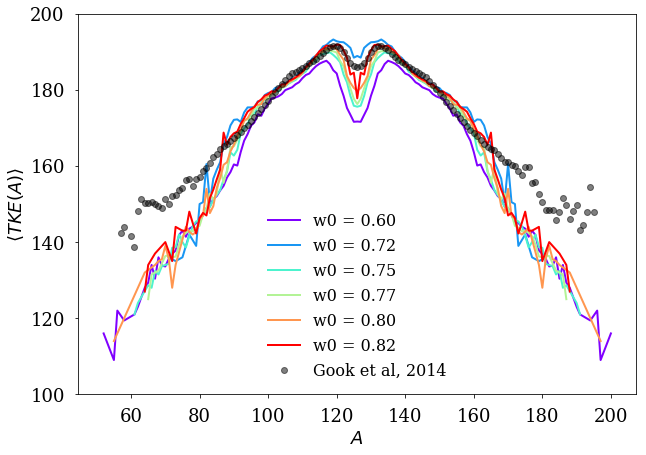

In [142]:
plotallTKEA('w0', w0)

Data Gathered from w1. 
Data Gathered from w1. 


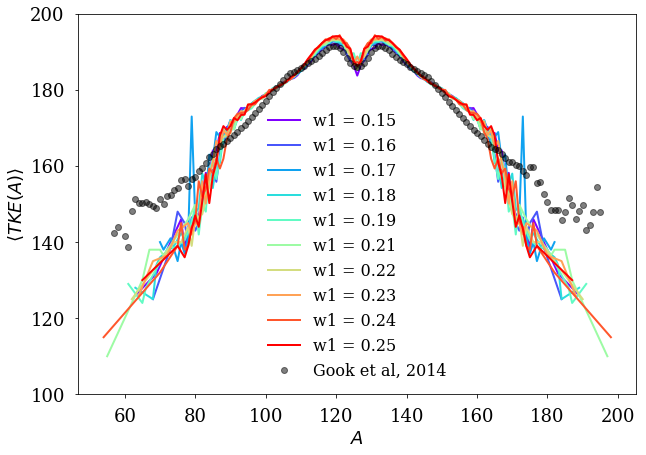

In [143]:
plotallTKEA('w1', w1)

Data Gathered from w2. 
Data Gathered from w2. 


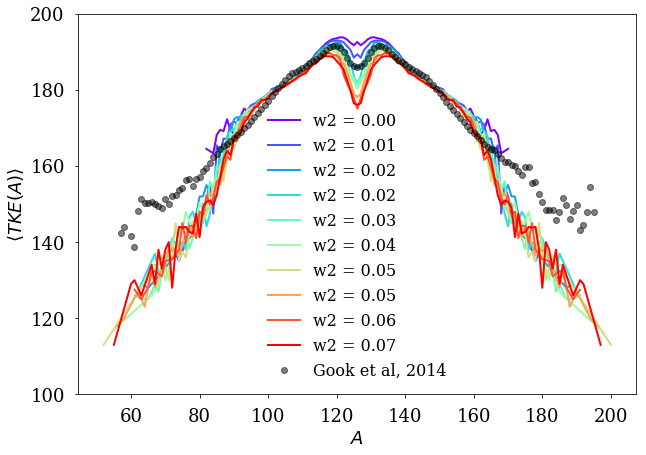

In [144]:
plotallTKEA('w2', w2)

Data Gathered from dmin0. 
Data Gathered from dmin0. 


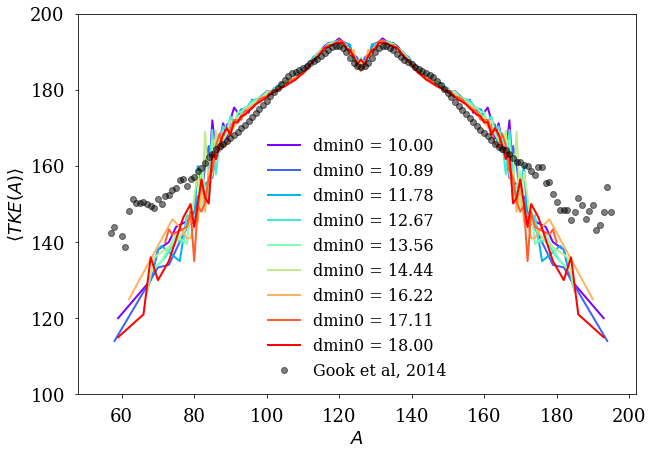

In [145]:
plotallTKEA('dmin0', dmin0)

Data Gathered from dmin1. 
Data Gathered from dmin1. 


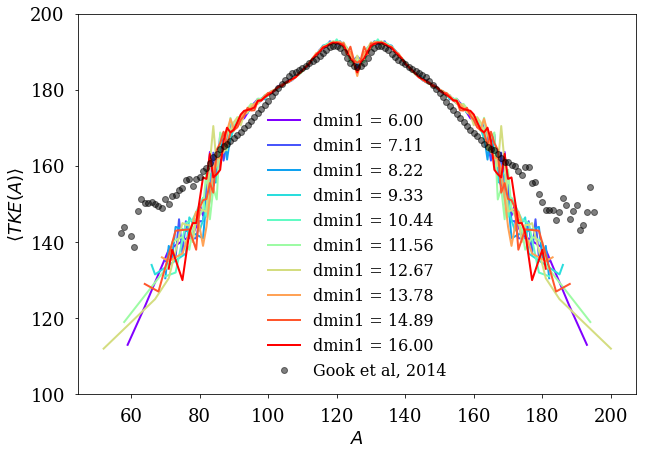

In [146]:
plotallTKEA('dmin1', dmin1)

Data Gathered from dmin2. 
Data Gathered from dmin2. 


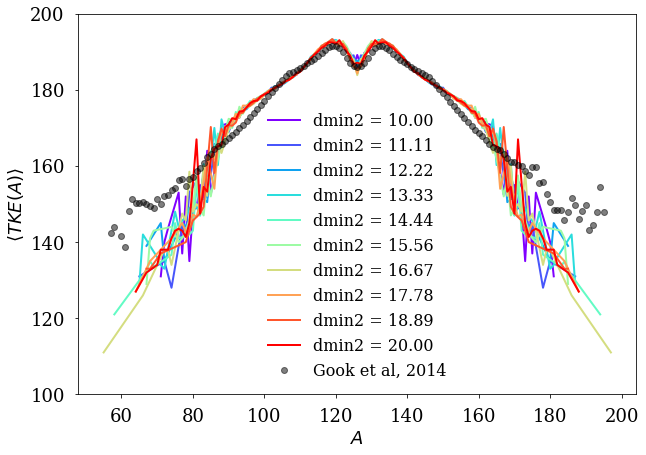

In [147]:
plotallTKEA('dmin2', dmin2)

Data Gathered from dmax0. 
Data Gathered from dmax0. 


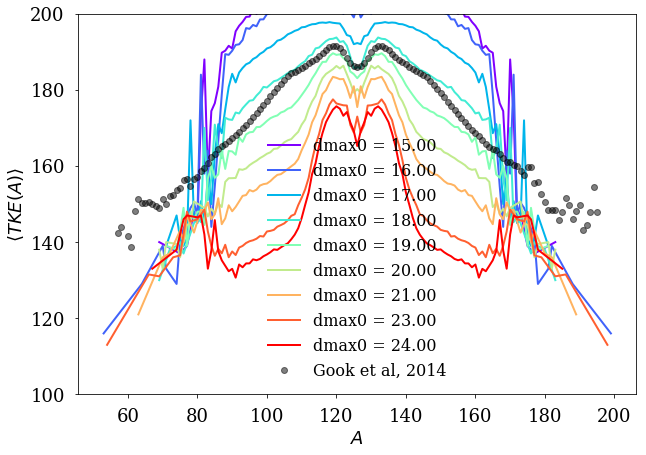

In [148]:
plotallTKEA('dmax0', dmax0)

Data Gathered from dmax1. 
Data Gathered from dmax1. 


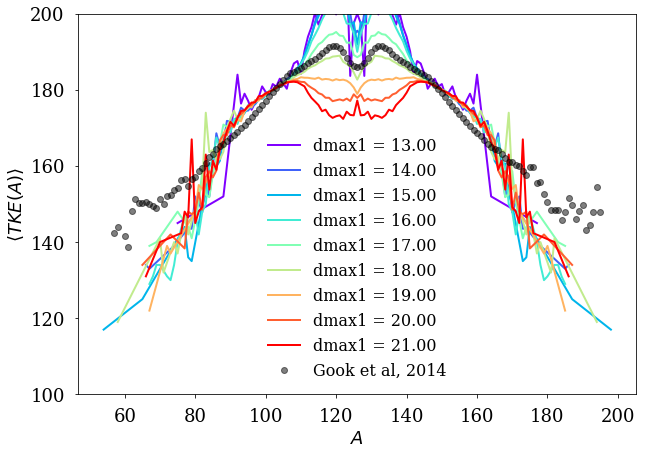

In [149]:
plotallTKEA('dmax1', dmax1)

Data Gathered from dmax2. 
Data Gathered from dmax2. 


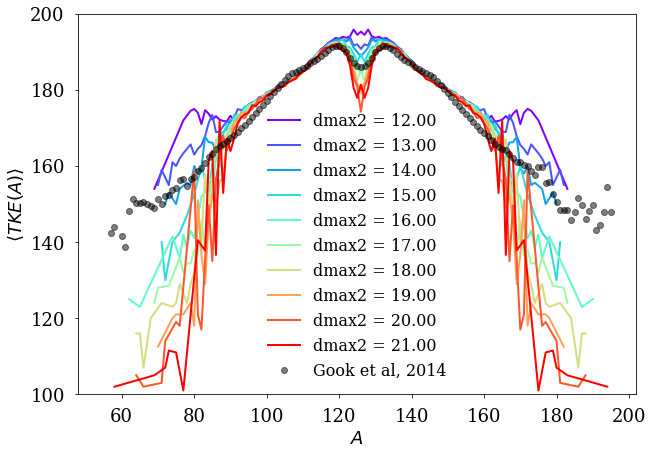

In [150]:
plotallTKEA('dmax2', dmax2)

Data Gathered from ddec0. 
Data Gathered from ddec0. 


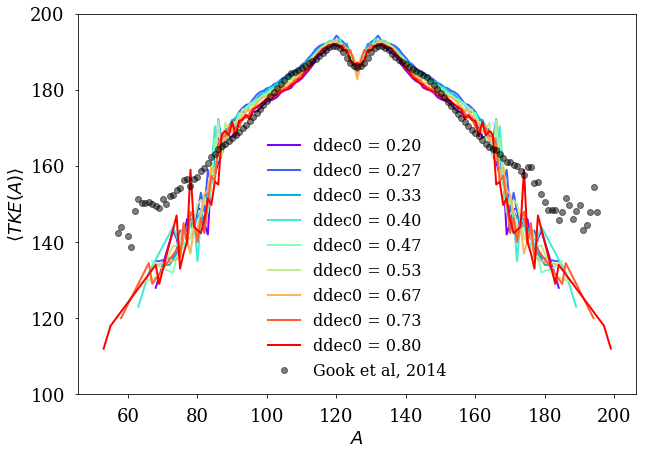

In [151]:
plotallTKEA('ddec0', ddec0)

Data Gathered from ddec1. 
Data Gathered from ddec1. 


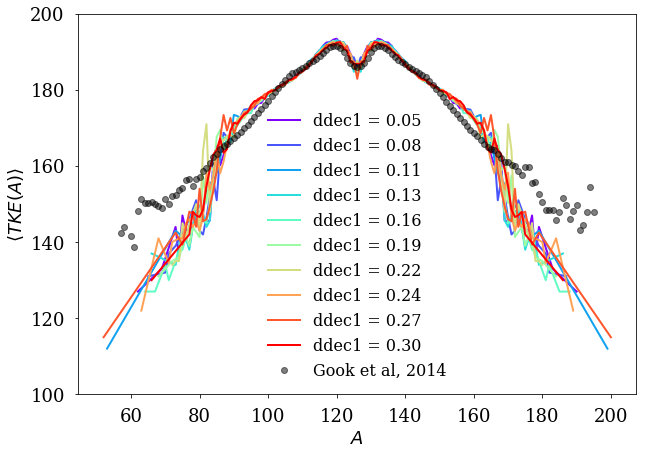

In [152]:
plotallTKEA('ddec1', ddec1)

Data Gathered from ddec2. 
Data Gathered from ddec2. 


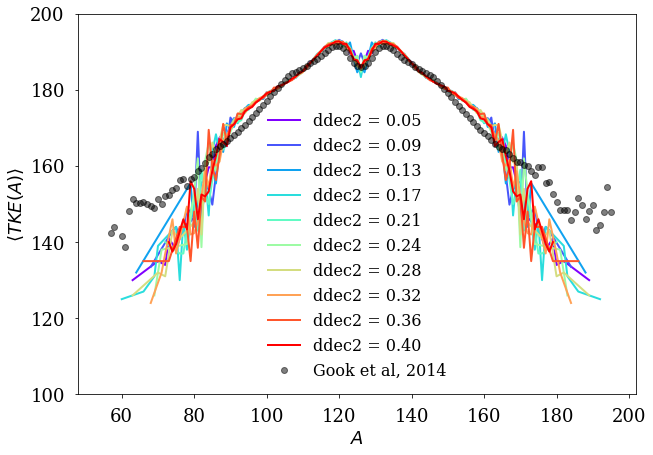

In [153]:
plotallTKEA('ddec2', ddec2)

Data Gathered from Abar0. 
Data Gathered from Abar0. 


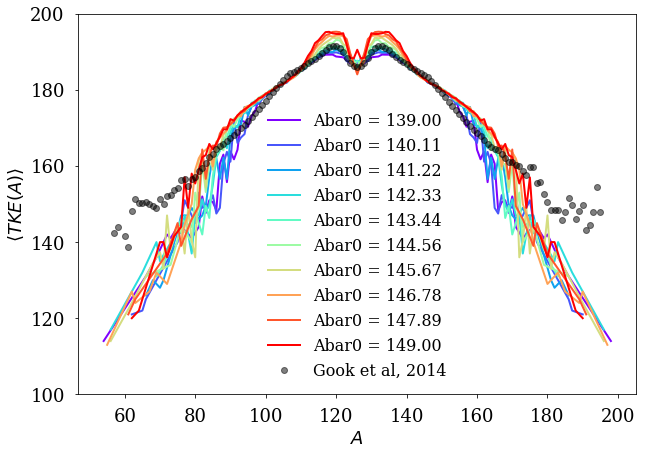

In [154]:
plotallTKEA('Abar0', Abar0)

Data Gathered from Abar1. 
Data Gathered from Abar1. 


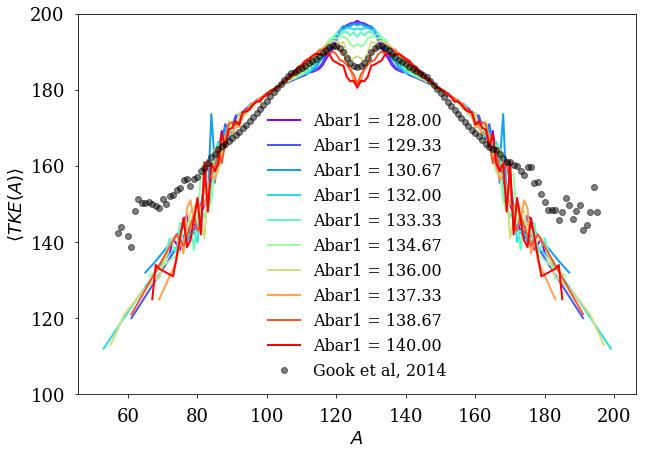

In [155]:
plotallTKEA('Abar1', Abar1)

Data Gathered from sigA0. 
Data Gathered from sigA0. 


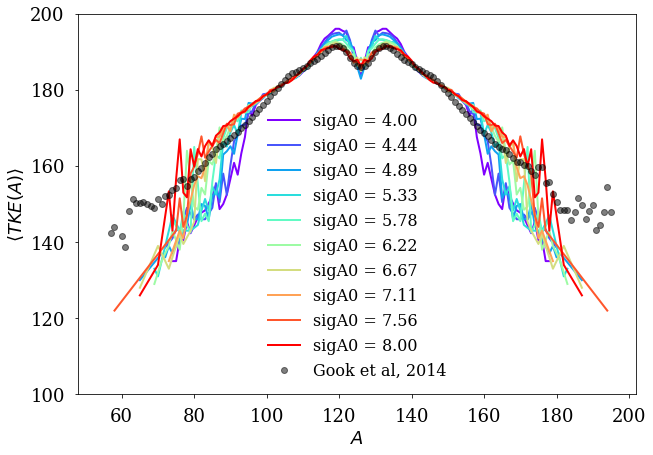

In [156]:
plotallTKEA('sigA0', sigA0)

Data Gathered from sigA1. 
Data Gathered from sigA1. 


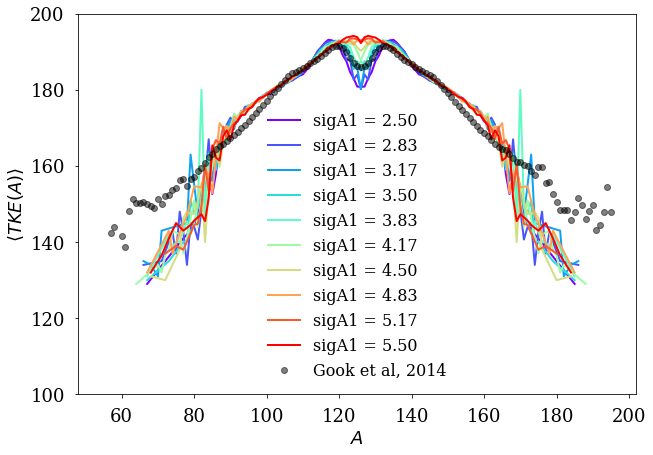

In [157]:
plotallTKEA('sigA1', sigA1)

Data Gathered from sigA2. 
Data Gathered from sigA2. 


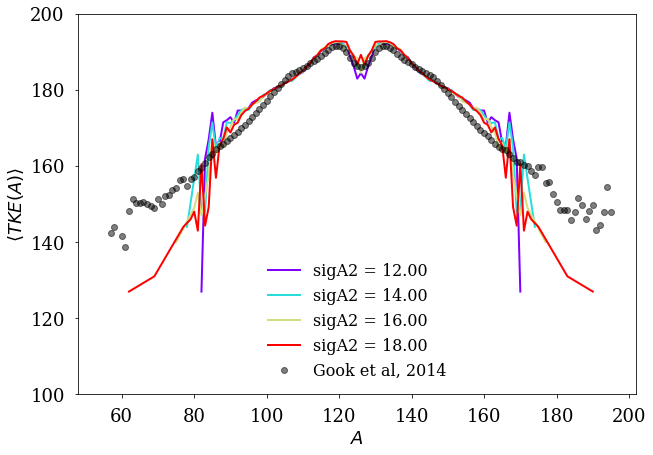

In [158]:
plotallTKEA('sigA2', sigA2)

Data Gathered from w0. 
Data Gathered from w0. 


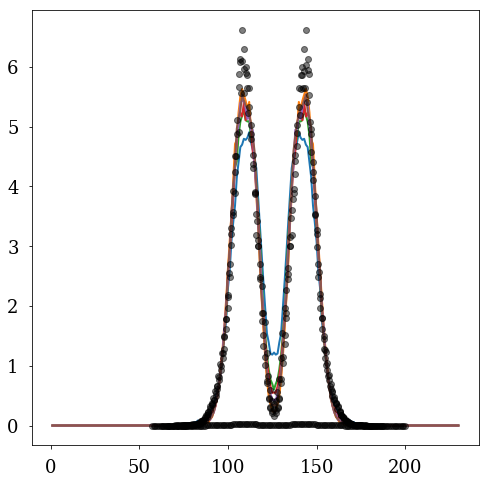

In [159]:
TKEw0 = getdata('TKE', ['w0'])
Aw0   = getdata('A', ['w0'])
i = 0
color=iter(cm.rainbow(np.linspace(0,1,len(w1))))
fig, axHist = plt.subplots(figsize=(8,8))
for k,v in TKEw0.items(): 
    A_bins = np.linspace(0.5, 230.5, 231)
    c=next(color)
    plt.plot(np.linspace(1,230,230),200*np.histogram(Aw0[k], bins = A_bins,  normed=True)[0])
    i += 1
plotExperimentalData ('YA',format="ko")